# Instantaneous Frequency

### Import packages and manage settings

In [1]:
import textwrap
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = [15, 12]

### Generate example time series

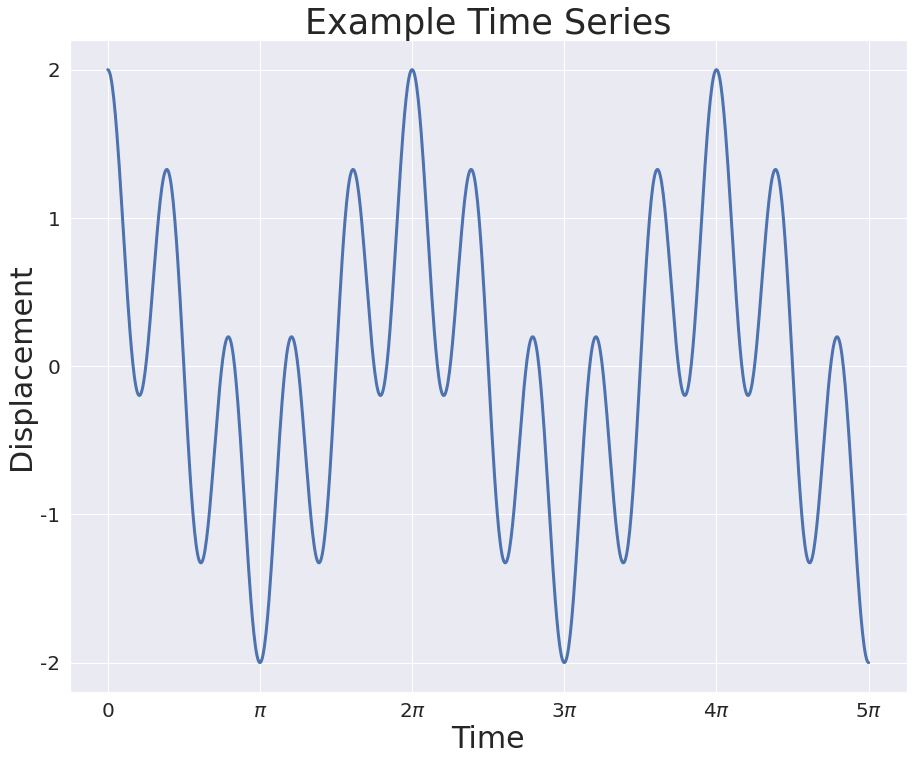

In [4]:
start = 0
end = 5 * np.pi
time_points = 1001

time = np.linspace(start, end, time_points)
time_series = np.cos(time) + np.cos(5 * time)

plt.plot(time, time_series, linewidth=3)
plt.title('Example Time Series', fontsize=35)
plt.xlabel('Time', fontsize=30)
plt.xticks((0, 1 * np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi), (r'$0$', r'$\pi$', r'2$\pi$', r'3$\pi$', r'4$\pi$', r'5$\pi$'), fontsize=20)
plt.ylabel('Displacement', fontsize=30)
plt.yticks((-2, -1, 0, 1, 2), ('-2', '-1', '0', '1', '2'), fontsize=20)
plt.show()

## Fourier Transform (Full Frequency Information)

In [5]:
from scipy.fft import fft, fftfreq # import Fourier transform packages

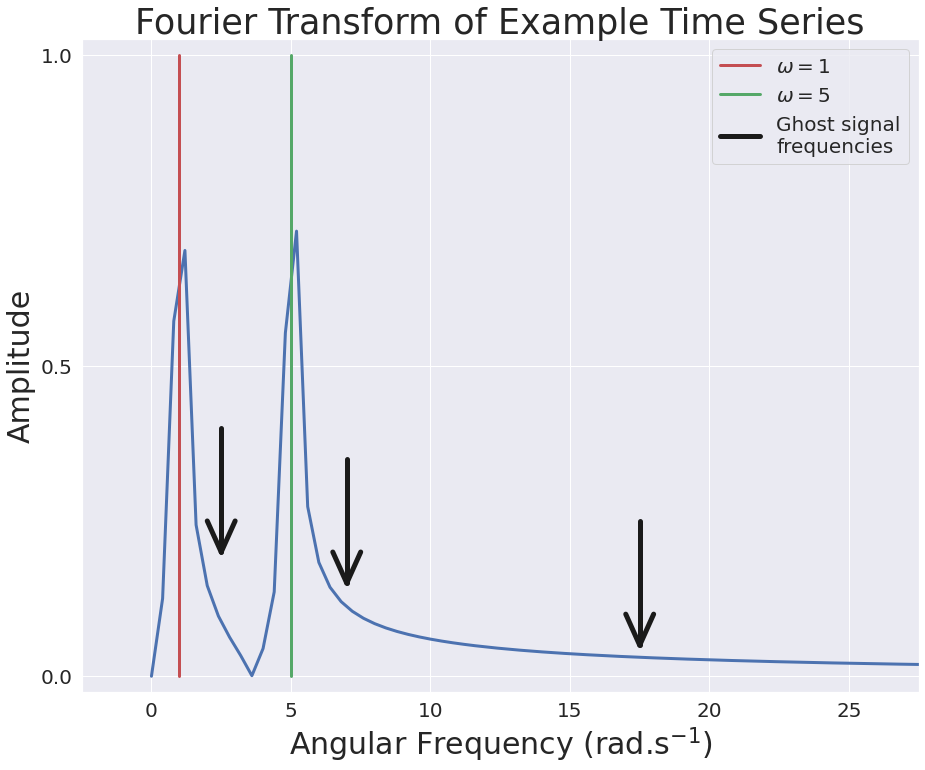

In [6]:
sample_points = time_points - 1
sample_spacing = end / sample_points

f_time_series = fft(time_series)
f_time = fftfreq(sample_points, sample_spacing)[:sample_points//2] * 2 * np.pi  # convert to angular frequnecy

plt.plot(f_time, 2.0 / sample_points * np.abs(f_time_series[0:sample_points//2]), linewidth=3)
plt.plot(np.ones(100), np.linspace(0, 1, 100), 'r-', label=r'$\omega = 1$', linewidth=3)
plt.plot(5 * np.ones(100), np.linspace(0, 1, 100), 'g-', label=r'$\omega = 5$', linewidth=3)
plt.plot(7 * np.ones(101), np.linspace(0.15, 0.35, 101), 'k-', linewidth=5)
plt.plot(np.linspace(7, 7.5, 101), np.linspace(0.15, 0.20, 101), 'k-', linewidth=5)
plt.plot(np.linspace(7, 6.5, 101), np.linspace(0.15, 0.20, 101), 'k-', linewidth=5)
plt.plot(2.5 * np.ones(101), np.linspace(0.2, 0.4, 101), 'k-', linewidth=5)
plt.plot(np.linspace(2.5, 3, 101), np.linspace(0.2, 0.25, 101), 'k-', linewidth=5)
plt.plot(np.linspace(2.5, 2, 101), np.linspace(0.2, 0.25, 101), 'k-', linewidth=5)
plt.plot(17.5 * np.ones(101), np.linspace(0.05, 0.25, 101), 'k-', linewidth=5)
plt.plot(np.linspace(17.5, 18, 101), np.linspace(0.05, 0.10, 101), 'k-', linewidth=5)
plt.plot(np.linspace(17.5, 17, 101), np.linspace(0.05, 0.10, 101), 'k-', linewidth=5, label=textwrap.fill('Ghost signal frequencies', 12))
plt.title('Fourier Transform of Example Time Series', fontsize=35)
plt.xlabel('Angular Frequency (rad.s$^{-1}$)', fontsize=30)
plt.xticks((0, 5, 10, 15, 20, 25), fontsize=20)
plt.ylabel('Amplitude', fontsize=30)
plt.yticks((0, 0.5, 1), fontsize=20)
plt.ylim(-0.025, 1.025)
plt.xlim(-2.5, 27.5)
plt.legend(loc='upper right', fontsize=20)
plt.show()

### Notice the "Ghost signal frequencies" in the above plot.
\
This happens when the Fourier transform is applied to a time series with a non-integer number of wavelengths. Note how this feature vanishes in example below. 

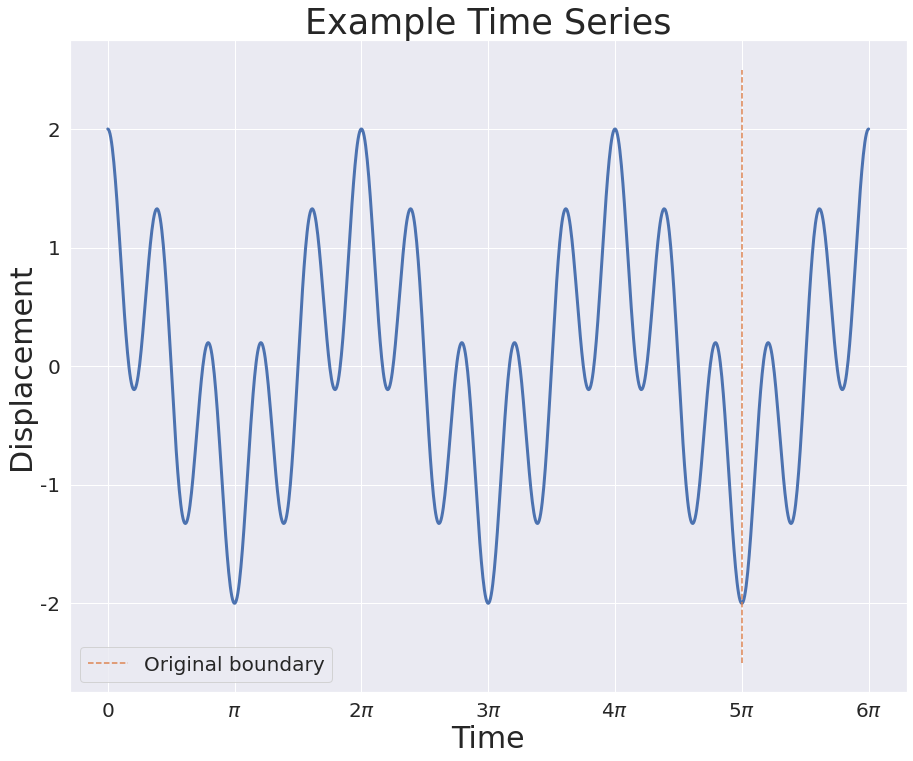

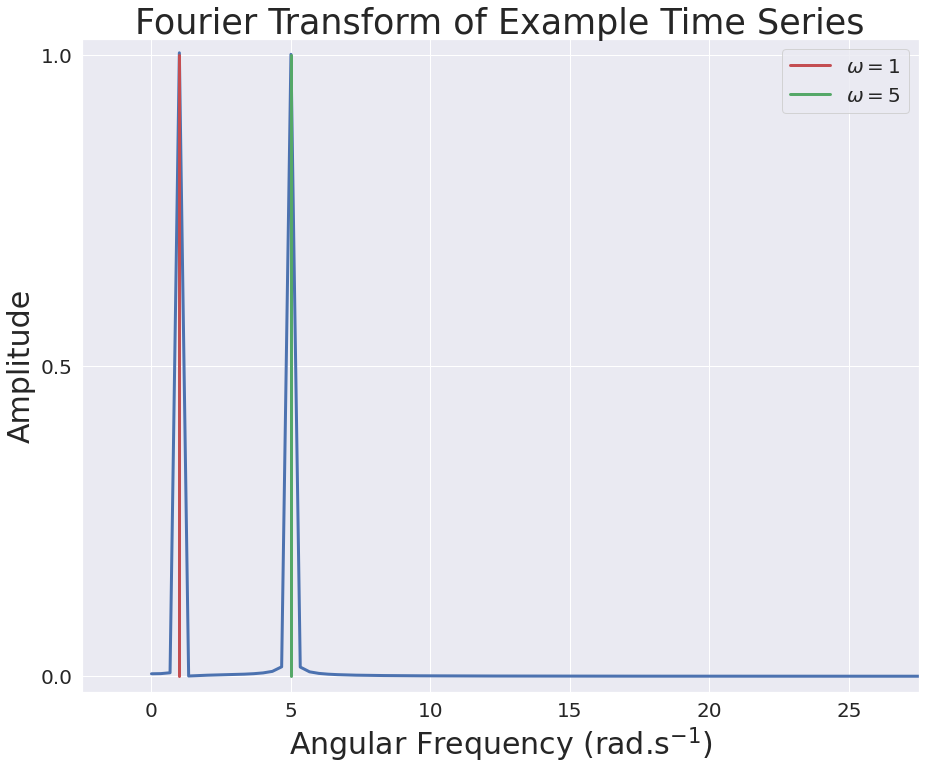

In [7]:
temp_end = 6 * np.pi
temp_time = np.linspace(start, temp_end, time_points)
temp_time_series = np.cos(temp_time) + np.cos(5 * temp_time)
                                              
plt.plot(temp_time, temp_time_series, linewidth=3)
plt.title('Example Time Series', fontsize=35)
plt.xlabel('Time', fontsize=30)
plt.xticks((0, 1 * np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi, 6 * np.pi), (r'$0$', r'$\pi$', r'2$\pi$', r'3$\pi$', r'4$\pi$', r'5$\pi$', r'6$\pi$'), fontsize=20)
plt.ylabel('Displacement', fontsize=30)
plt.yticks((-2, -1, 0, 1, 2), ('-2', '-1', '0', '1', '2'), fontsize=20)
plt.plot(5 * np.pi * np.ones(101), np.linspace(-2.5, 2.5 , 101), '--', label='Original boundary')
plt.legend(loc='lower left', fontsize=20)
plt.show()

sample_points = time_points - 1
sample_spacing = temp_end / sample_points

temp_f_time_series = fft(temp_time_series)
temp_f_time = fftfreq(sample_points, sample_spacing)[:sample_points//2] * 2 * np.pi  # convert to angular frequnecy

plt.plot(temp_f_time, 2.0 / sample_points * np.abs(temp_f_time_series[0:sample_points//2]), linewidth=3)
plt.plot(np.ones(100), np.linspace(0, 1, 100), 'r-', label=r'$\omega = 1$', linewidth=3)
plt.plot(5 * np.ones(100), np.linspace(0, 1, 100), 'g-', label=r'$\omega = 5$', linewidth=3)
plt.title('Fourier Transform of Example Time Series', fontsize=35)
plt.xlabel('Angular Frequency (rad.s$^{-1}$)', fontsize=30)
plt.xticks((0, 5, 10, 15, 20, 25), fontsize=20)
plt.ylabel('Amplitude', fontsize=30)
plt.yticks((0, 0.5, 1), fontsize=20)
plt.ylim(-0.025, 1.025)
plt.xlim(-2.5, 27.5)
plt.legend(loc='upper right', fontsize=20)
plt.show()

### Notice that in the above frequency plots that all the temporal (time) information is lost.

## Short-Time Fourier Transform (STFT)

### Custom short-time Fourier transform function (for demonstration purposes)

In [8]:
from scipy import signal as sig
import scipy as sp

In [9]:
def stft_custom(time: np.ndarray, time_series: np.ndarray, window: str = 'hann', window_width: int = 256, plot: bool = False, angular_frequency: bool = True) -> (np.ndarray, np.ndarray, np.ndarray):
    
    try:
        # normalise and left Riemann sum approximate window
        window_func = sig.get_window(window=window, Nx=(window_width + 1), fftbins=False)
        window_func = window_func[:-1] / np.sum(window_func[:-1])
    except:
        if window == 'none':
            window_func = np.ones(window_width) / np.sum(np.ones(window_width))

    # how much must be added to create an integer multiple of window length
    addition = int(int(window_width / 2) - int((len(time_series) + window_width) % int(window_width / 2)))

    # integer multiple of window length
    time_series_new = np.hstack((np.zeros(int(window_width / 2)), time_series, np.zeros(int(window_width / 2 + addition))))

    # storage of windowed Fourier transform
    z = np.zeros((int(len(time_series_new) / (window_width / 2) - 1), int(window_width)))

    # calculate sampling rate for frequency
    sampling_rate = len(time) / (time[-1] - time[0])
    # sampling_rate = len(time) / np.pi

    for row in range(np.shape(z)[0]):
        # multiply window_func onto interval 'row'
        z[row, :] = window_func * time_series_new[int(row * (window_width / 2)):int((row + 2) * (window_width / 2))]
    # real Fourier transform the matrix
    z = np.transpose(sp.fft.rfft(z, n=window_width))
    # calculate frequency vector
    if angular_frequency:
        constant = 2 * np.pi
    else:
        constant = 1
    f = constant * np.linspace(0, (sampling_rate / 2), int(window_width / 2 + 1))
    # calculate time vector
    t = np.linspace(time[0], time[-1] + (time[-1] - time[0]) * (addition / len(time_series)),
                    int(len(time_series_new) / (window_width / 2) - 1))

    if plot:
        plt.pcolormesh(t, f, np.abs(z), vmin=0, vmax=np.max(np.max(np.abs(z))))
        plt.ylabel('f')
        plt.xlabel('t')
        plt.show()

    return t, f, z

### Brief demonstration of function

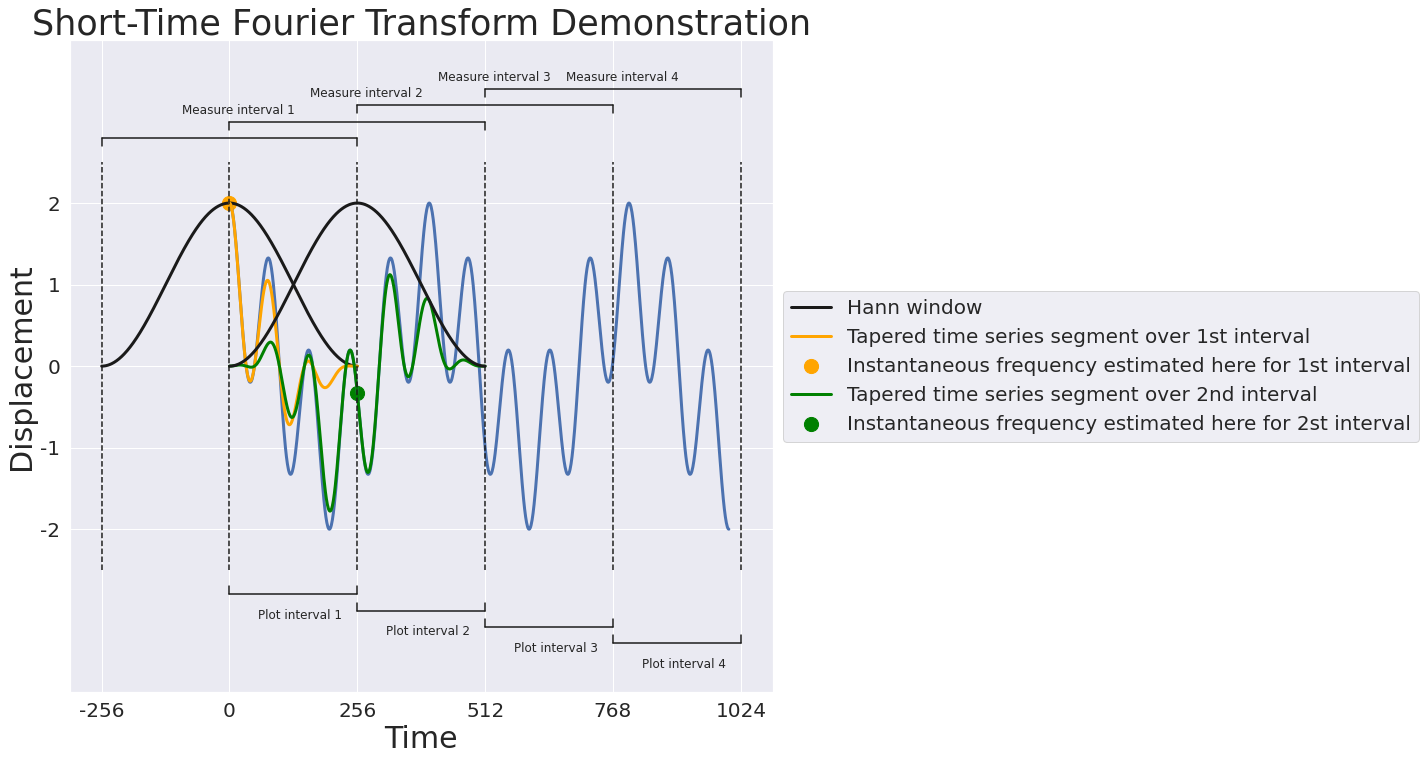

In [10]:
n = 512
hann_window = sp.signal.get_window(window='hann', Nx = n + 1, fftbins=False)

extended_time_series = np.empty(1001 + 24 + 256)
extended_time_series[:] = np.nan
ext_time_series = extended_time_series.copy()
ext_time_series[256:1257] = time_series
ext_time = np.linspace(5 * np.pi * (-256 / 1000), 5 * np.pi * (1024 / 1000), 1001 + 24 + 256)

extended_time_series_1 = extended_time_series.copy()
extended_time_series_1[:513] = ext_time_series[:513] * hann_window

extended_time_series_2 = extended_time_series.copy()
extended_time_series_2[256:769] = ext_time_series[256:769] * hann_window

ax = plt.subplot(111)
plt.plot(time, time_series, linewidth=3)
plt.plot(ext_time[:513], 2 * hann_window, linewidth=3, c='k', label='Hann window')
plt.plot(ext_time, extended_time_series_1, linewidth=3, c='orange', label='Tapered time series segment over 1st interval')
plt.scatter(ext_time[256], 2, label='Instantaneous frequency estimated here for 1st interval', s=200, c='orange')
plt.plot(ext_time, extended_time_series_2, linewidth=3, c='green', label='Tapered time series segment over 2nd interval')
plt.plot(ext_time[256:769], 2 * hann_window, linewidth=3, c='k')
plt.scatter(ext_time[512], ext_time_series[512], label='Instantaneous frequency estimated here for 2st interval', s=200, c='green')
plt.title('Short-Time Fourier Transform Demonstration', fontsize=35)
plt.xlabel('Time', fontsize=30)
plt.xticks((5 * np.pi * (-256 / 1000), 0, 5 * np.pi * (256 / 1000), 5 * np.pi * (512 / 1000), 5 * np.pi * (768 / 1000), 5 * np.pi * (1024 / 1000)), 
           ('-256', '0', '256', '512', '768', '1024'), fontsize=20)
for i in [5 * np.pi * (-256 / 1000), 0, 5 * np.pi * (256 / 1000), 5 * np.pi * (512 / 1000), 5 * np.pi * (768 / 1000), 5 * np.pi * (1024 / 1000)]:
    plt.plot(i * np.ones(101), np.linspace(-2.5, 2.5, 101), 'k--')
for j in [5 * np.pi * (-256 / 1000), 0, 5 * np.pi * (256 / 1000), 5 * np.pi * (512 / 1000)]:
    plt.plot()
jump = 0.2
x1 = 5 * np.pi * (-256 / 1000)
x2 = 5 * np.pi * (256 / 1000)
x1_lower = 0
interval = 1
for k in [5 * np.pi * (-256 / 1000), 0, 5 * np.pi * (256 / 1000), 5 * np.pi * (512 / 1000)]:
    plt.plot(np.linspace(k, k + 5 * np.pi * (512 / 1000), 101), 2.6 + jump * np.ones(101), 'k-')
    plt.plot(x1 * np.ones(101), np.linspace(2.6 + jump, 2.6 + jump - 0.1, 101), 'k-')
    plt.plot(x2 * np.ones(101), np.linspace(2.6 + jump, 2.6 + jump - 0.1, 101), 'k-')
    
    plt.plot(np.linspace(k + 5 * np.pi * (256 / 1000), k + 5 * np.pi * (512 / 1000), 101), -2.6 - jump * np.ones(101), 'k-')
    plt.plot(x1_lower * np.ones(101), np.linspace(-2.6 - jump, -2.6 - jump + 0.1, 101), 'k-')
    plt.plot(x2 * np.ones(101), np.linspace(-2.6 - jump, -2.6 - jump + 0.1, 101), 'k-')
    
    if interval == 4:
        plt.text(x1 + np.pi - 0.6, 2.6 + jump + 0.3 - 0.2, f'Measure interval {interval}')
        plt.text(x1_lower + 0.9, -2.6 - jump - 0.3, f'Plot interval {interval}')
    else:
        plt.text(x1 + np.pi - 0.6, 2.6 + jump + 0.3, f'Measure interval {interval}')
        plt.text(x1_lower + 0.9, -2.6 - jump - 0.3, f'Plot interval {interval}')
    x1 += 5 * np.pi * (256 / 1000)
    x2 += 5 * np.pi * (256 / 1000)
    x1_lower += 5 * np.pi * (256 / 1000)
    jump += 0.2
    interval += 1
plt.ylim(-4, 4)
plt.ylabel('Displacement', fontsize=30)
plt.yticks((-2, -1, 0, 1, 2), ('-2', '-1', '0', '1', '2'), fontsize=20)

box_0 = ax.get_position()
ax.set_position([box_0.x0 - 0.05, box_0.y0, box_0.width * 0.84, box_0.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)
plt.show()

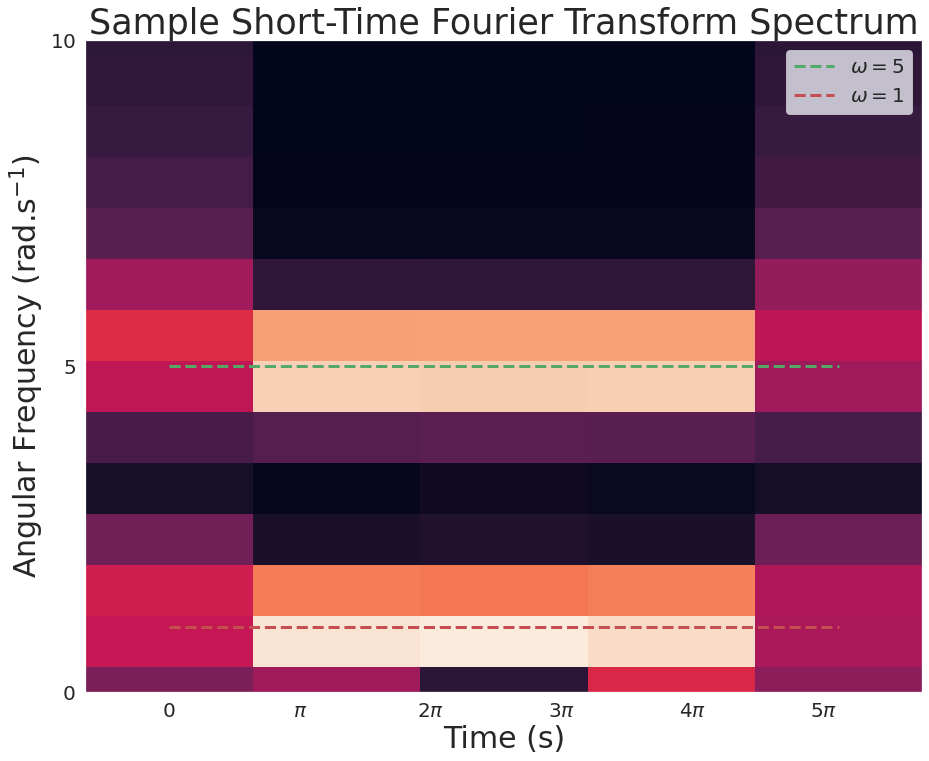

In [15]:
x_hs, y, z = stft_custom(time=time, time_series=time_series, window_width=512)
z_min, z_max = 0, np.abs(z).max()

ax = plt.subplot(111)
plt.title('Sample Short-Time Fourier Transform Spectrum', fontsize=35)
ax.grid(False)
ax.pcolormesh(x_hs, y, np.abs(z), vmin=z_min, vmax=z_max)
ax.plot(x_hs, 5 * np.ones_like(x_hs), 'g--', label=r'$\omega = 5$', linewidth=3)
ax.plot(x_hs, 1 * np.ones_like(x_hs), 'r--', label=r'$\omega = 1$', linewidth=3)
ax.set_xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi])
ax.set_xticklabels(['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$', r'$5\pi$'], fontsize=20)
ax.set_yticks([0, 5, 10])
ax.set_yticklabels(['$0$', '$5$', '$10$'], fontsize=20)
plt.ylabel(r'Angular Frequency (rad.s$^{-1}$)', fontsize=30)
plt.ylim(0, 10)
plt.xlabel('Time (s)', fontsize=30)
ax.legend(loc='upper right', fontsize=20)
plt.show()

### Make Fourier transform and short-time Fourier transform comparable.

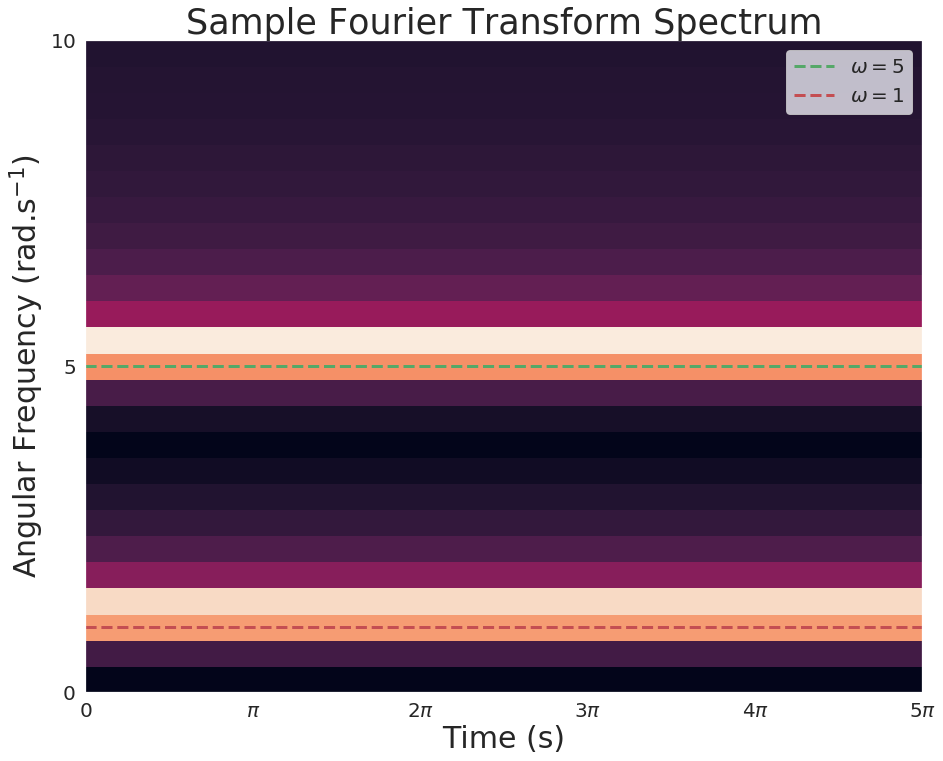

In [12]:
x_hs, y, z = [0, 5 * np.pi], f_time, (2.0 / sample_points * np.abs(f_time_series[0:sample_points//2])).reshape(-1, 1)
z_min, z_max = 0, np.abs(z).max()

ax = plt.subplot(111)
plt.title('Sample Fourier Transform Spectrum', fontsize=35)
ax.pcolormesh(x_hs, y, np.abs(z), vmin=z_min, vmax=z_max)
ax.plot(x_hs, 5 * np.ones_like(x_hs), 'g--', label=r'$\omega = 5$', linewidth=3)
ax.plot(x_hs, 1 * np.ones_like(x_hs), 'r--', label=r'$\omega = 1$', linewidth=3)
ax.set_xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi])
ax.set_xticklabels(['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$', r'$5\pi$'], fontsize=20)
ax.set_yticks([0, 5, 10])
ax.set_yticklabels(['$0$', '$5$', '$10$'], fontsize=20)
plt.ylabel(r'Angular Frequency (rad.s$^{-1}$)', fontsize=30)
plt.ylim(0, 10)
plt.xlabel('Time (s)', fontsize=30)
ax.legend(loc='upper right', fontsize=20)
plt.show()

### Notice that in the above Fourier frequency plot that all the temporal (time) information is lost.
\
In other words, the frequency is calculated to be the same at all time points.\
\
Also notice that the frequency bands are narrower in the Fourier transform plot. Here lies the trade-off between the Fourier transform and short-time Fourier transform.\
\
With the Fourier transform, the highest frequency resolution is attained at the cost of all the temporal resolution. The short-time Fourier transform seeks to provide some temporal informatio at the cost of some frequency information.\
\
This concept would be better demonstrated in a time series with a higher modulated frequency.

### Demonstrate trade-off between Fourier transform and short-time Fourier transform

Note the top figure:\
\
The right half of the left figure and the right figure are also indistinguishable.\
\
Note on the following figures as the window width is slowly decreased:\
\
Each block remains the area as the temporal resolution increases, but the frequency resolution decrease.

[0, 15.707963267948966]


/tmp/ipykernel_63/1108030937.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  axs[0].pcolormesh(x_hs, y, np.abs(z), vmin=z_min, vmax=z_max)


TypeError: Dimensions of C (500, 1) are incompatible with X (2) and/or Y (500); see help(pcolormesh)

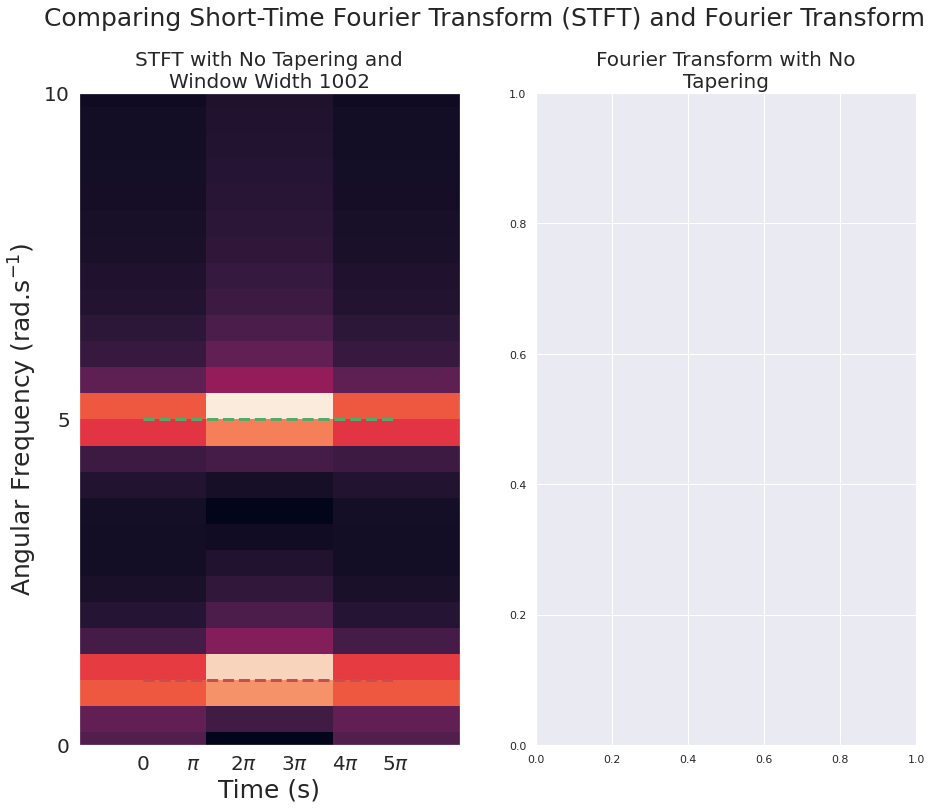

In [26]:
x_hs, y, z = stft_custom(time=time, time_series=time_series, window_width=1002, window='none')
z_min, z_max = 0, np.abs(z).max()

fig, axs = plt.subplots(1, 2)

plt.suptitle('Comparing Short-Time Fourier Transform (STFT) and Fourier Transform', fontsize=25)
axs[0].set_title(textwrap.fill('STFT with No Tapering and Window Width 1002', 30), fontsize=20)
ax.grid(False)
axs[0].pcolormesh(x_hs, y, np.abs(z), vmin=z_min, vmax=z_max)
axs[0].plot(x_hs, 5 * np.ones_like(x_hs), 'g--', label=r'$\omega = 5$', linewidth=3)
axs[0].plot(x_hs, 1 * np.ones_like(x_hs), 'r--', label=r'$\omega = 1$', linewidth=3)
axs[0].set_xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi])
axs[0].set_xticklabels(['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$', r'$5\pi$'], fontsize=20)
axs[0].set_yticks([0, 5, 10])
axs[0].set_yticklabels(['$0$', '$5$', '$10$'], fontsize=20)
axs[0].set_ylabel(r'Angular Frequency (rad.s$^{-1}$)', fontsize=25)
axs[0].set_ylim(0, 10)
axs[0].set_xlabel('Time (s)', fontsize=25)

x_hs, y, z = [0, 5 * np.pi], f_time, (2.0 / sample_points * np.abs(f_time_series[0:sample_points//2])).reshape(-1, 1)
z_min, z_max = 0, np.abs(z).max()

axs[1].set_title(textwrap.fill('Fourier Transform with No Tapering', 30), fontsize=20)
ax.grid(False)
print(x_hs)
axs[1].pcolormesh(x_hs, y, np.abs(z), vmin=z_min, vmax=z_max)
axs[1].plot(x_hs, 5 * np.ones_like(x_hs), 'g--', label=r'$\omega = 5$', linewidth=3)
axs[1].plot(x_hs, 1 * np.ones_like(x_hs), 'r--', label=r'$\omega = 1$', linewidth=3)
axs[1].set_xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi])
axs[1].set_xticklabels(['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$', r'$5\pi$'], fontsize=20)
axs[1].set_yticks([0])
axs[1].set_yticklabels([' '], fontsize=20)
axs[1].set_ylim(0, 10)
axs[1].set_xlabel('Time (s)', fontsize=25)
plt.show()

for width in [1024, 512, 256, 128, 64]:
    x_hs, y, z = stft_custom(time=time, time_series=time_series, window_width=width)
    z_min, z_max = 0, np.abs(z).max()

    ax = plt.subplot(111)
    plt.title(f'Sample Short-Time Fourier Transform Spectrum with Hann Window Width {width}', fontsize=20)
    ax.grid(False)
    ax.pcolormesh(x_hs, y, np.abs(z), vmin=z_min, vmax=z_max)
    ax.plot(x_hs, 5 * np.ones_like(x_hs), 'g--', label=r'$\omega = 5$', linewidth=3)
    ax.plot(x_hs, 1 * np.ones_like(x_hs), 'r--', label=r'$\omega = 1$', linewidth=3)
    ax.set_xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi])
    ax.set_xticklabels(['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$', r'$5\pi$'], fontsize=20)
    ax.set_yticks([0, 5, 10])
    ax.set_yticklabels(['$0$', '$5$', '$10$'], fontsize=20)
    plt.ylabel(r'Angular Frequency (rad.s$^{-1}$)', fontsize=30)
    plt.ylim(0, 10)
    plt.xlabel('Time (s)', fontsize=30)
    ax.legend(loc='upper right', fontsize=20)
    plt.show()

### Custom frequnecy-modulating function (for demonstration purposes)

In [27]:
def frequency(time_signal, frequency_period, min_frequency, max_frequency):

    end_time = time_signal[-1]  # last time point value
    # time over which frequency changes from minimum frequency to maximum frequency or vice versa
    freq_half_mod = frequency_period / 2  # half period
    time_points = len(time_signal)  # total number of time points
    time_diff = np.diff(time_signal)  # difference between time points

    increments = int(end_time / freq_half_mod)

    increment_length = int(max((time_points - 1) / increments, 1))  # minimum set to 1 as trivial

    new_time_signal = np.zeros_like(time_signal)
    new_time_signal[0] = time_signal[0]

    for i in range(1, time_points):
        if np.mod(i / increment_length, 1) == 0:
            temp_mod = 1
        else:
            temp_mod = np.mod(i / increment_length, 1)
        if ((i - 1) // increment_length) % 2 == 0:
            new_time_signal[i] = new_time_signal[i - 1] + (min_frequency + temp_mod * (max_frequency - min_frequency)) \
                                 * time_diff[i - 1]
        else:
            new_time_signal[i] = new_time_signal[i - 1] + (max_frequency - temp_mod * (max_frequency - min_frequency)) \
                                 * time_diff[i - 1]

    return new_time_signal

def derivative_forward_diff(signal, time):

    derivative = (signal[:-1] - signal[1:]) / (time[:-1] - time[1:])

    return derivative

### Create frequency-modulated time series.

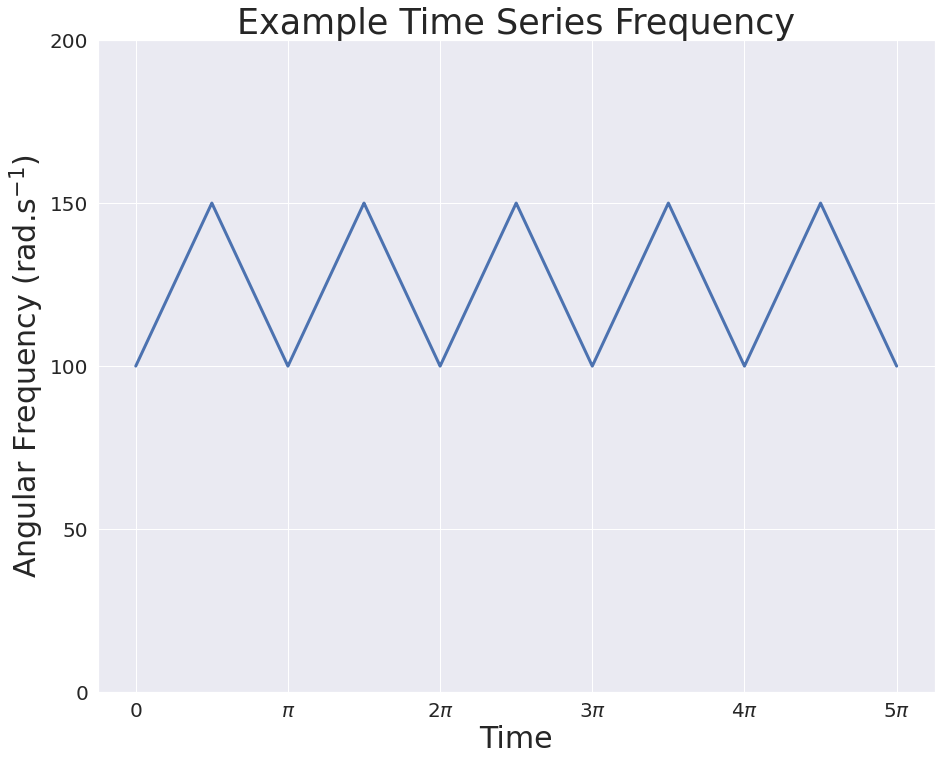

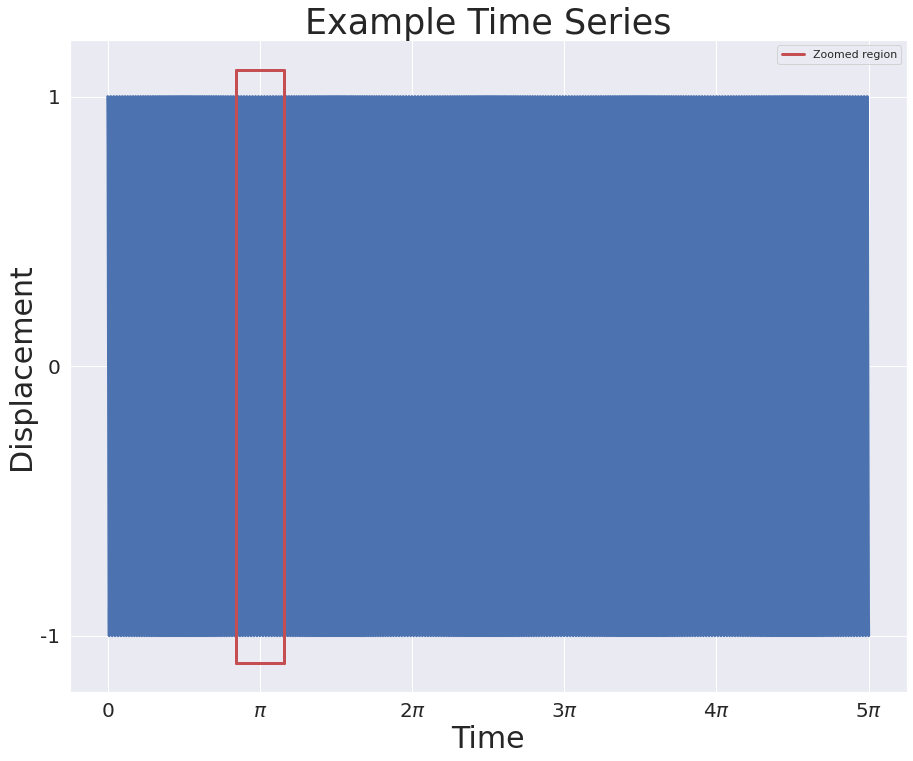

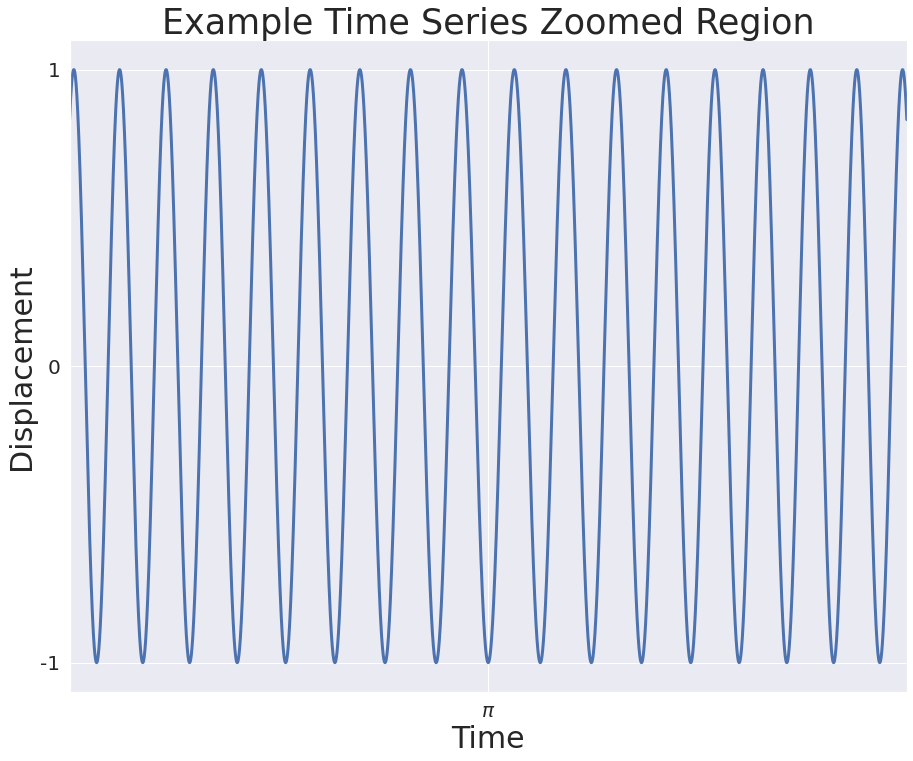

In [28]:
time_points = 100001
time = np.linspace(start, end, time_points)

modulated_time = frequency(time, np.pi, 100, 150)
modulated_time_series = np.cos(modulated_time)

freq = derivative_forward_diff(modulated_time, time)
plt.plot(time[:-1], freq, linewidth=3)
plt.title('Example Time Series Frequency', fontsize=35)
plt.xlabel('Time', fontsize=30)
plt.xticks((0, 1 * np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi), (r'$0$', r'$\pi$', r'2$\pi$', r'3$\pi$', r'4$\pi$', r'5$\pi$'), fontsize=20)
plt.ylabel('Angular Frequency (rad.s$^{-1}$)', fontsize=30)
plt.yticks((0, 50, 100, 150, 200), ('0', '50', '100', '150', '200'), fontsize=20)
plt.ylim(0, 200)
plt.show()

plt.plot(time, modulated_time_series, linewidth=3)
plt.plot((np.pi - 0.5) * np.ones(101), np.linspace(-1.1, 1.1, 101), 'r-', linewidth=3)
plt.plot((np.pi + 0.5) * np.ones(101), np.linspace(-1.1, 1.1, 101), 'r-', linewidth=3)
plt.plot(np.linspace(np.pi - 0.5, np.pi + 0.5, 101), -1.1 * np.ones(101), 'r-', linewidth=3)
plt.plot(np.linspace(np.pi - 0.5, np.pi + 0.5, 101), 1.1 * np.ones(101), 'r-', linewidth=3, label='Zoomed region')
plt.title('Example Time Series', fontsize=35)
plt.xlabel('Time', fontsize=30)
plt.xticks((0, 1 * np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi), (r'$0$', r'$\pi$', r'2$\pi$', r'3$\pi$', r'4$\pi$', r'5$\pi$'), fontsize=20)
plt.ylabel('Displacement', fontsize=30)
plt.yticks((-1, 0, 1), ('-1', '0', '1'), fontsize=20)
plt.legend(loc='upper right')
plt.show()

plt.plot(time, modulated_time_series, linewidth=3)
plt.title('Example Time Series Zoomed Region', fontsize=35)
plt.xlabel('Time', fontsize=30)
plt.xticks((0, 1 * np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi), (r'$0$', r'$\pi$', r'2$\pi$', r'3$\pi$', r'4$\pi$', r'5$\pi$'), fontsize=20)
plt.ylabel('Displacement', fontsize=30)
plt.yticks((-1, 0, 1), ('-1', '0', '1'), fontsize=20)
plt.xlim(np.pi - 0.5, np.pi + 0.5)
plt.ylim(-1.1, 1.1)
plt.show()

## Fourier transform of frequency modulated time series

TypeError: Dimensions of C (500, 1) are incompatible with X (2) and/or Y (500); see help(pcolormesh)

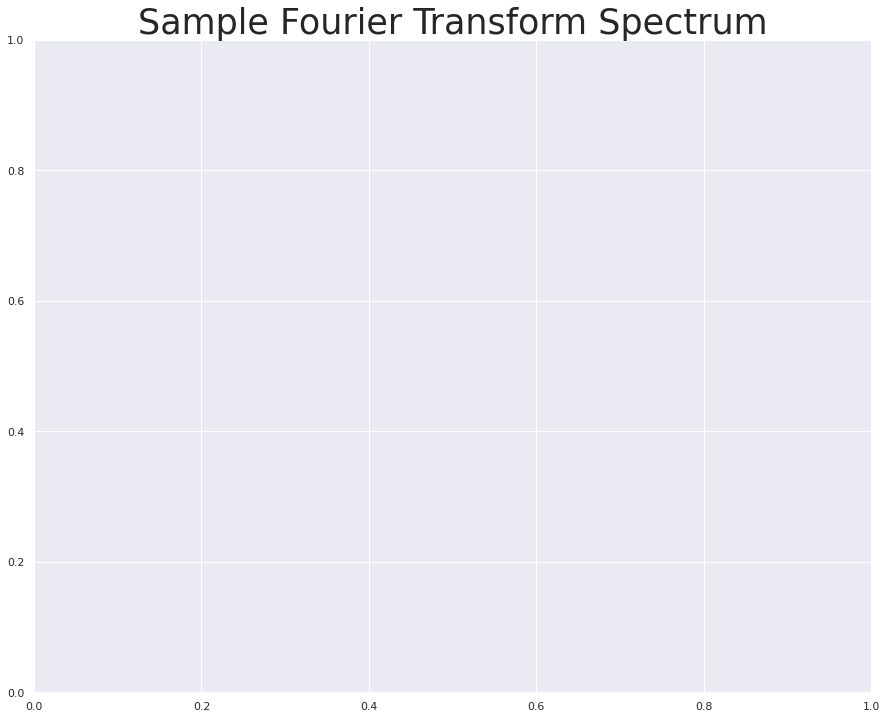

In [29]:
f_time_series = fft(modulated_time_series)
f_time = fftfreq(sample_points, sample_spacing)[:sample_points//2] * 2 * np.pi  # convert to angular frequnecy

x_hs, y, z = [0, 5 * np.pi], f_time, (2.0 / sample_points * np.abs(f_time_series[0:sample_points//2])).reshape(-1, 1)
z_min, z_max = 0, np.abs(z).max()

ax = plt.subplot(111)
plt.title('Sample Fourier Transform Spectrum', fontsize=35)
ax.pcolormesh(x_hs, y, np.abs(z), vmin=z_min, vmax=z_max)
plt.plot(time[:-1], freq, '--', linewidth=3, label='True frequency')
ax.set_xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi])
ax.set_xticklabels(['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$', r'$5\pi$'], fontsize=20)
ax.set_yticks([0, 50, 100, 150])
ax.set_yticklabels(['$0$', '$50$', '$100$', '$150$'], fontsize=20)
plt.ylabel(r'Angular Frequency (rad.s$^{-1}$)', fontsize=30)
plt.ylim(0, 165)
plt.xlabel('Time (s)', fontsize=30)
ax.legend(loc='upper right', fontsize=20)
plt.show()

## Short-time Fourier transform of frequency modulated time series

/tmp/ipykernel_63/1863355702.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.pcolormesh(x_hs, y, np.abs(z), vmin=z_min, vmax=z_max)


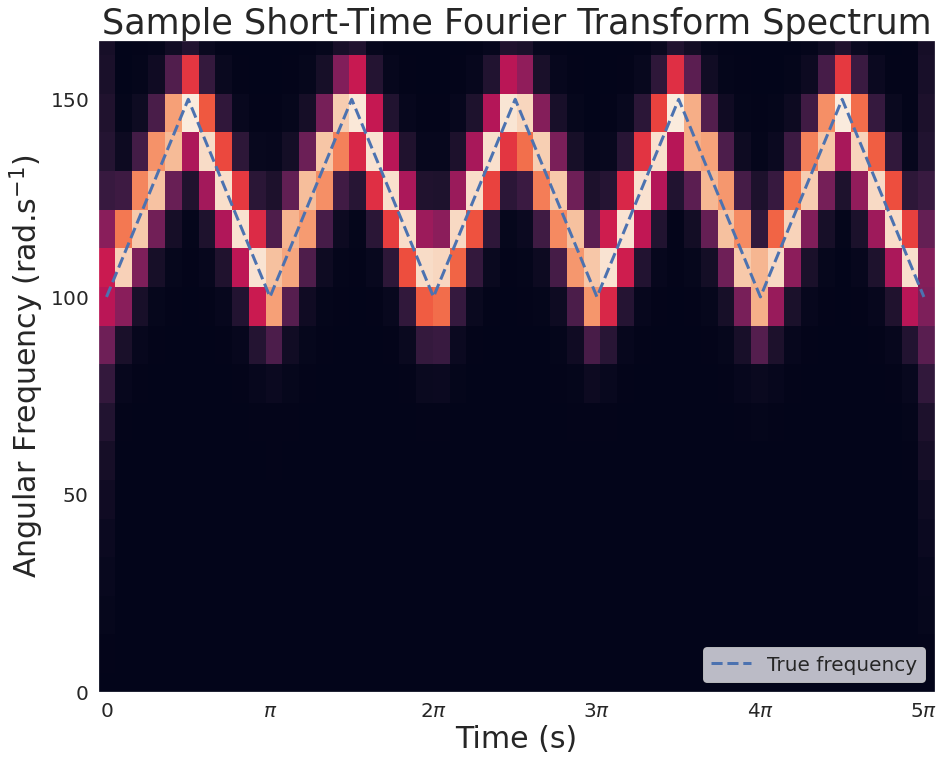

In [30]:
x_hs, y, z = stft_custom(time=time, time_series=modulated_time_series, window_width=4096)
z_min, z_max = 0, np.abs(z).max()

ax = plt.subplot(111)
plt.title('Sample Short-Time Fourier Transform Spectrum', fontsize=35)
ax.pcolormesh(x_hs, y, np.abs(z), vmin=z_min, vmax=z_max)
plt.plot(time[:-1], freq, '--', linewidth=3, label='True frequency')
ax.set_xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi])
ax.set_xticklabels(['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$', r'$5\pi$'], fontsize=20)
ax.set_yticks([0, 50, 100, 150])
ax.set_yticklabels(['$0$', '$50$', '$100$', '$150$'], fontsize=20)
plt.ylabel(r'Angular Frequency (rad.s$^{-1}$)', fontsize=30)
plt.ylim(0, 165)
plt.xlabel('Time (s)', fontsize=30)
ax.legend(loc='lower right', fontsize=20)
plt.show()

## Short-time Fourier transform window function demonstration
\
Most popular windows used in short-time Fourier transform are the Hann window and Hamming window.\
\
These window functions are the simplest examples from a family of window functions known as the Generalised Cosine Windows.

## Hann and Hamming window:

\begin{equation}
    H(t) = a_0 - (1 − a_0)cos\bigg(\frac{2\pi{t}}{N}\bigg)
\end{equation}

### Hann window:
\
\begin{equation}
a_0 = 0.5
\end{equation}
\
\begin{equation}
    H(t) = 0.5\Bigg(1 - \text{cos}\bigg(\frac{2\pi{t}}{N}\bigg)\Bigg) = \text{sin}^{2}\bigg(\frac{\pi{t}}{N}\bigg)
\end{equation}

### Hamming window:
\
\begin{equation}
a_0 = 0.53836
\end{equation}
\
\begin{equation}
    H(t) = 0.53836 - 0.46164cos\bigg(\frac{2\pi{t}}{N}\bigg)
\end{equation}

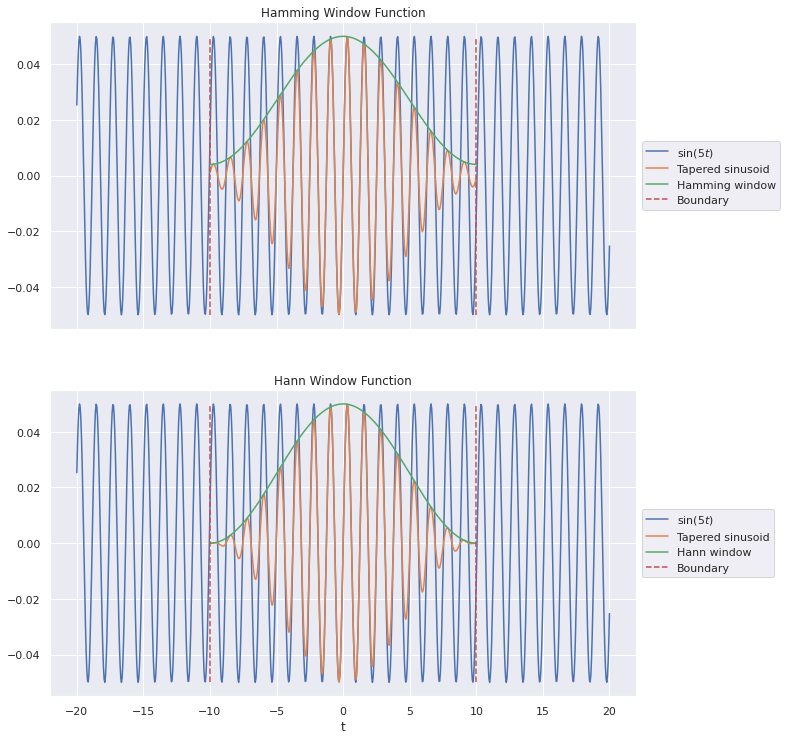

In [31]:
q = 20
n = 2 * 10 * q

window_function_hamming = sp.signal.firwin(n+1, 1. / q, window='hamming')
hamming_window = sp.signal.get_window(window='hamming', Nx = n + 1, fftbins=False)
window_function_calculation_hamming = window_function_hamming[200] * hamming_window * np.sin(5 * (np.linspace(0, 400, 401) - 200) / q)

window_function_hann = sp.signal.firwin(n+1, 1. / q, window='hann')
hann_window = sp.signal.get_window(window='hann', Nx = n + 1, fftbins=False)
window_function_calculation_hann = window_function_hann[200] * hann_window * np.sin(5 * (np.linspace(0, 400, 401) - 200) / q)

fig, axs = plt.subplots(2, 1)
plt.subplots_adjust(hspace=0.2)
axs[0].set_title('Hamming Window Function')
axs[0].plot(((np.linspace(0, 800, 801) - 400) / q), window_function_hamming[200] * np.sin(5 * (np.linspace(0, 800, 801) - 400) / q),
         label=r'sin($5t$)')
axs[0].plot(((np.linspace(0, 400, 401) - 200) / q), window_function_calculation_hamming, label='Tapered sinusoid')
axs[0].plot(((np.linspace(0, 400, 401) - 200) / q), window_function_hamming[200] * hamming_window, label='Hamming window')
axs[0].plot(10 * np.ones(100), np.linspace(-0.05, 0.05, 100), 'r--', label='Boundary')
axs[0].plot(-10 * np.ones(100), np.linspace(-0.05, 0.05, 100), 'r--',)

axs[1].set_title('Hann Window Function')
axs[1].plot(((np.linspace(0, 800, 801) - 400) / q), window_function_hann[200] * np.sin(5 * (np.linspace(0, 800, 801) - 400) / q),
         label=r'sin($5t$)')
axs[1].plot(((np.linspace(0, 400, 401) - 200) / q), window_function_calculation_hann, label='Tapered sinusoid')
axs[1].plot(((np.linspace(0, 400, 401) - 200) / q), window_function_hann[200] * hann_window, label='Hann window')
axs[1].plot(10 * np.ones(100), np.linspace(-0.05, 0.05, 100), 'r--', label='Boundary')
axs[1].plot(-10 * np.ones(100), np.linspace(-0.05, 0.05, 100), 'r--',)

axis = 0
for ax in axs.flat:
    if axis == 0:
        plt.setp(axs[axis].get_xticklabels(), visible=False)
    if axis == 1:
        ax.set(xlabel='t')
    axis += 1

plt.gcf().subplots_adjust(bottom=0.1)
box_0 = axs[0].get_position()
box_1 = axs[1].get_position()
axs[0].set_position([box_0.x0, box_0.y0, box_0.width * 0.7, box_0.height])
axs[1].set_position([box_1.x0, box_1.y0, box_1.width * 0.7, box_1.height])
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### This serves to localise the frequency content of the time series over interval under observation.
\
If this tapering window function is negected one can see what happens. 

/tmp/ipykernel_63/3135497413.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.pcolormesh(x_hs, y, np.abs(z), vmin=z_min, vmax=z_max)


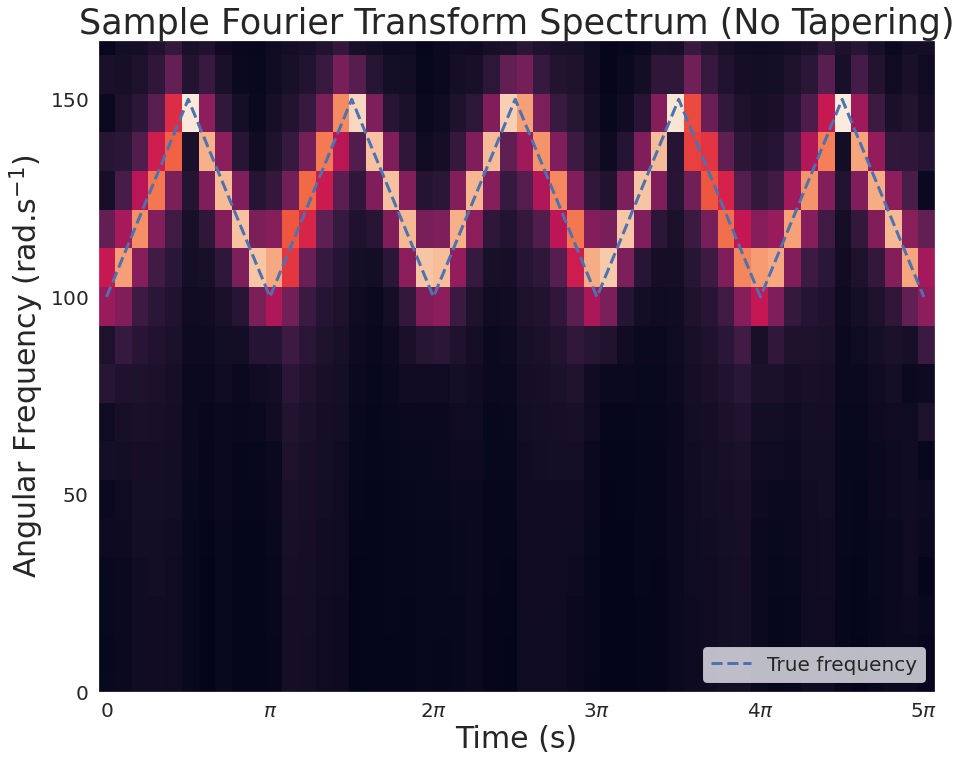

/tmp/ipykernel_63/3135497413.py:23: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.pcolormesh(x_hs, y, np.abs(z), vmin=z_min, vmax=z_max)


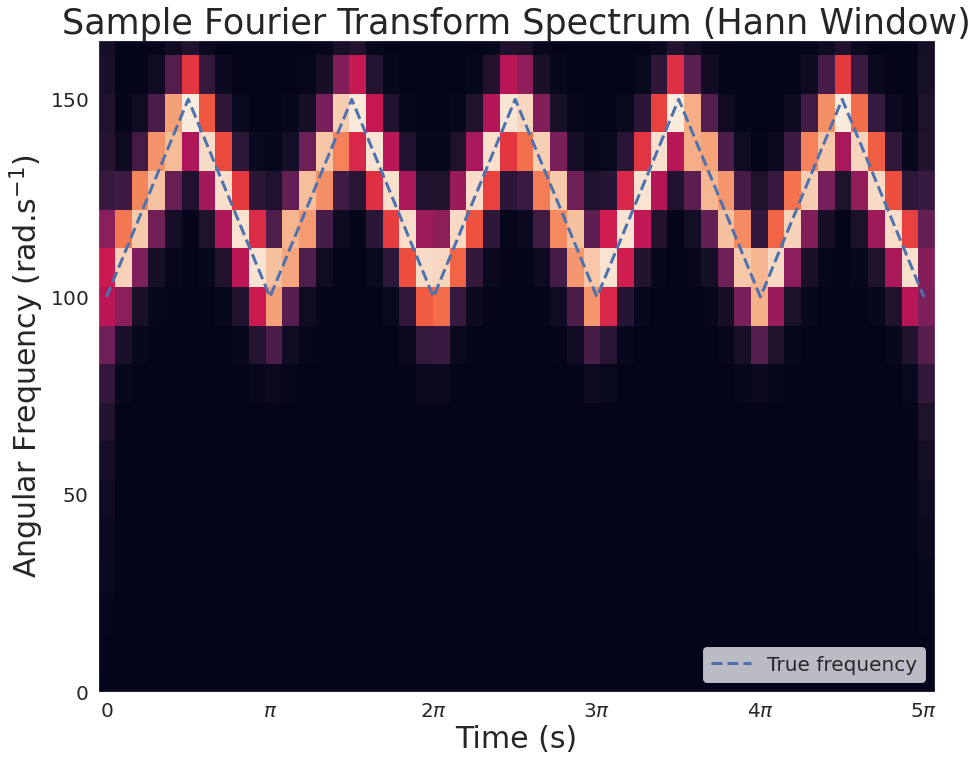

/tmp/ipykernel_63/3135497413.py:40: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.pcolormesh(x_hs, y, np.abs(z), vmin=z_min, vmax=z_max)


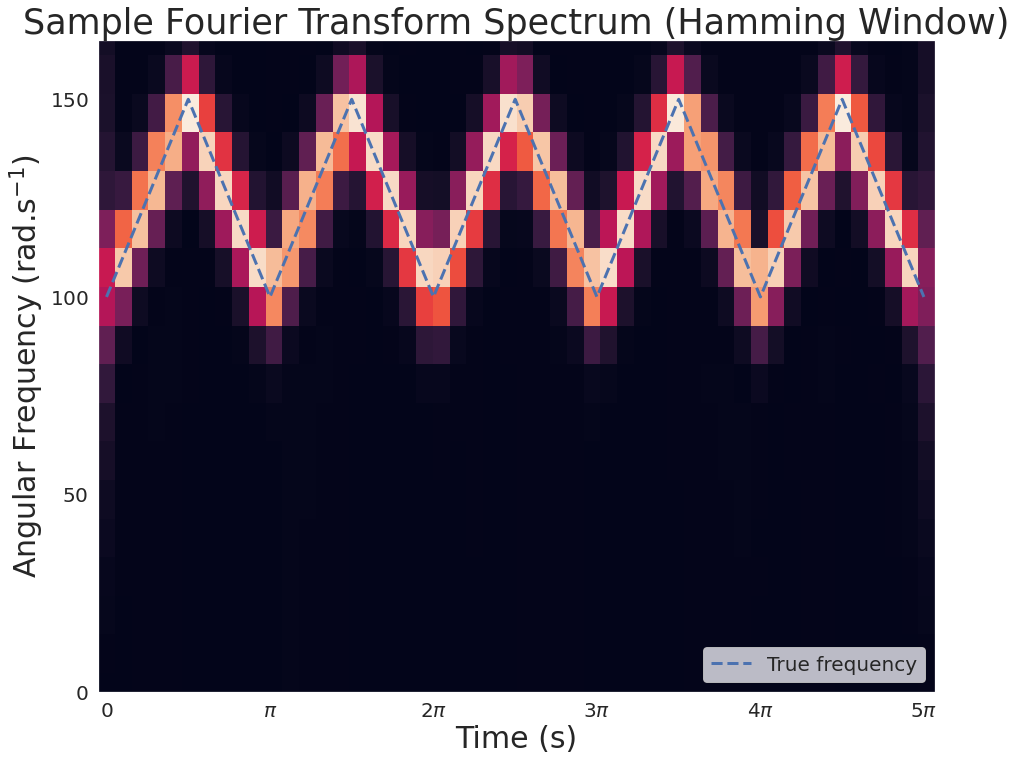

In [32]:
x_hs, y, z = stft_custom(time=time, time_series=modulated_time_series, window_width=4096, window='none')
z_min, z_max = 0, np.abs(z).max()

ax = plt.subplot(111)
plt.title('Sample Fourier Transform Spectrum (No Tapering)', fontsize=35)
ax.pcolormesh(x_hs, y, np.abs(z), vmin=z_min, vmax=z_max)
plt.plot(time[:-1], freq, '--', linewidth=3, label='True frequency')
ax.set_xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi])
ax.set_xticklabels(['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$', r'$5\pi$'], fontsize=20)
ax.set_yticks([0, 50, 100, 150])
ax.set_yticklabels(['$0$', '$50$', '$100$', '$150$'], fontsize=20)
plt.ylabel(r'Angular Frequency (rad.s$^{-1}$)', fontsize=30)
plt.ylim(0, 165)
plt.xlabel('Time (s)', fontsize=30)
ax.legend(loc='lower right', fontsize=20)
plt.show()

x_hs, y, z = stft_custom(time=time, time_series=modulated_time_series, window_width=4096, window='hann')
z_min, z_max = 0, np.abs(z).max()

ax = plt.subplot(111)
plt.title('Sample Fourier Transform Spectrum (Hann Window)', fontsize=35)
ax.pcolormesh(x_hs, y, np.abs(z), vmin=z_min, vmax=z_max)
plt.plot(time[:-1], freq, '--', linewidth=3, label='True frequency')
ax.set_xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi])
ax.set_xticklabels(['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$', r'$5\pi$'], fontsize=20)
ax.set_yticks([0, 50, 100, 150])
ax.set_yticklabels(['$0$', '$50$', '$100$', '$150$'], fontsize=20)
plt.ylabel(r'Angular Frequency (rad.s$^{-1}$)', fontsize=30)
plt.ylim(0, 165)
plt.xlabel('Time (s)', fontsize=30)
ax.legend(loc='lower right', fontsize=20)
plt.show()

x_hs, y, z = stft_custom(time=time, time_series=modulated_time_series, window_width=4096, window='hamming')
z_min, z_max = 0, np.abs(z).max()

ax = plt.subplot(111)
plt.title('Sample Fourier Transform Spectrum (Hamming Window)', fontsize=35)
ax.pcolormesh(x_hs, y, np.abs(z), vmin=z_min, vmax=z_max)
plt.plot(time[:-1], freq, '--', linewidth=3, label='True frequency')
ax.set_xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi])
ax.set_xticklabels(['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$', r'$5\pi$'], fontsize=20)
ax.set_yticks([0, 50, 100, 150])
ax.set_yticklabels(['$0$', '$50$', '$100$', '$150$'], fontsize=20)
plt.ylabel(r'Angular Frequency (rad.s$^{-1}$)', fontsize=30)
plt.ylim(0, 165)
plt.xlabel('Time (s)', fontsize=30)
ax.legend(loc='lower right', fontsize=20)
plt.show()

## Note:
\
See the frequency "leakage" when no appropriately chosen tapering window is chosen to localise the frequency content.

# Alternative to Fourier Analysis

## Morlet Wavelet Analysis

Developed in:\
\
Goupillaud, P., Grossmann, A., & Morlet, J. (1984). Cycle-octave and related transforms in seismic signal analysis.Geoexploration, 23(1), 85-102. doi: 10.1016/0016-7142(84)90025-5

### Define Morlet Window Function

In [20]:
def morlet_window(width, sigma):

    c_pi = (1 + np.exp(- sigma ** 2) - 2 * np.exp(- 0.75 * sigma ** 2)) ** (-1 / 2)
    x = (np.arange(width + 1) - (width / 2)) * (10 / width)
    wavelet = c_pi * (np.pi ** (-1 / 4)) * (np.exp(1j * sigma * x) - np.exp(- (1 / 2) * sigma ** 2))
    output = np.exp(- x ** 2) * wavelet.real
    return output

### Plot some Morlet Wavelet Packets (Fixed Window Width)

Bbox(x0=0.125, y0=0.09999999999999998, x1=0.9, y1=0.88)


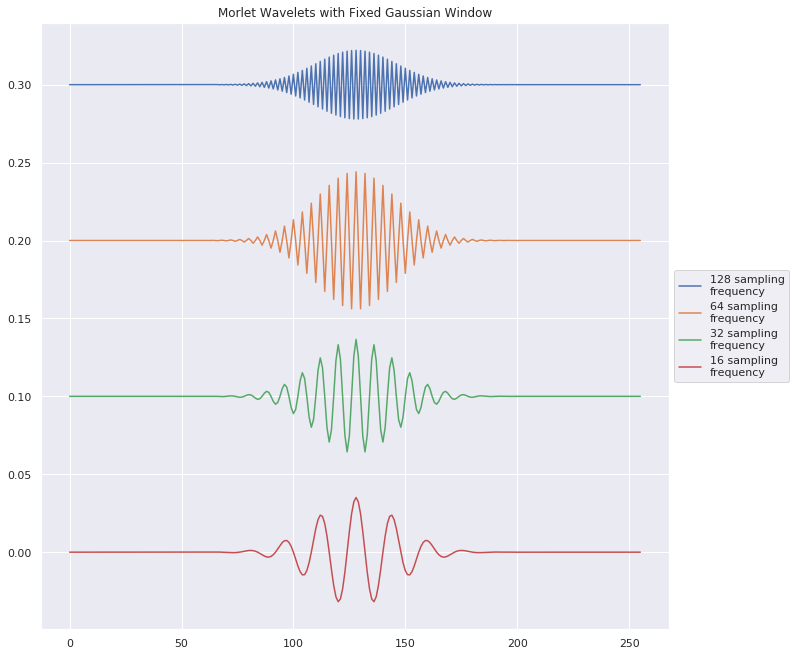

In [21]:
window_width = 256

window_morlet_128 = morlet_window(window_width, (128 * (2 * np.pi) / 10))
window_morlet_128 = window_morlet_128[:-1] / np.sum(np.abs(window_morlet_128[:-1]))
window_morlet_64 = morlet_window(window_width, (64 * (2 * np.pi) / 10))
window_morlet_64 = window_morlet_64[:-1] / np.sum(np.abs(window_morlet_64[:-1]))
window_morlet_32 = morlet_window(window_width, (32 * (2 * np.pi) / 10))
window_morlet_32 = window_morlet_32[:-1] / np.sum(np.abs(window_morlet_32[:-1]))
window_morlet_16 = morlet_window(window_width, (16 * (2 * np.pi) / 10))
window_morlet_16 = window_morlet_16[:-1] / np.sum(np.abs(window_morlet_16[:-1]))

ax = plt.subplot(111)
plt.gcf().subplots_adjust(bottom=0.10)
plt.plot(range(256), window_morlet_128 + 0.3,
         label=textwrap.fill('128 sampling frequency', 15))
plt.plot(range(256), window_morlet_64 + 0.2,
         label=textwrap.fill('64 sampling frequency', 15))
plt.plot(range(256), window_morlet_32 + 0.1,
         label=textwrap.fill('32 sampling frequency', 15))
plt.plot(range(256), window_morlet_16 + 0.0,
         label=textwrap.fill('16 sampling frequency', 15))
plt.title('Morlet Wavelets with Fixed Gaussian Window')

box_0 = ax.get_position()
print(box_0)
ax.set_position([box_0.x0, box_0.y0 + 0.05, box_0.width * 0.75, box_0.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Intervals over which Morlet Wavelet Analysis is done

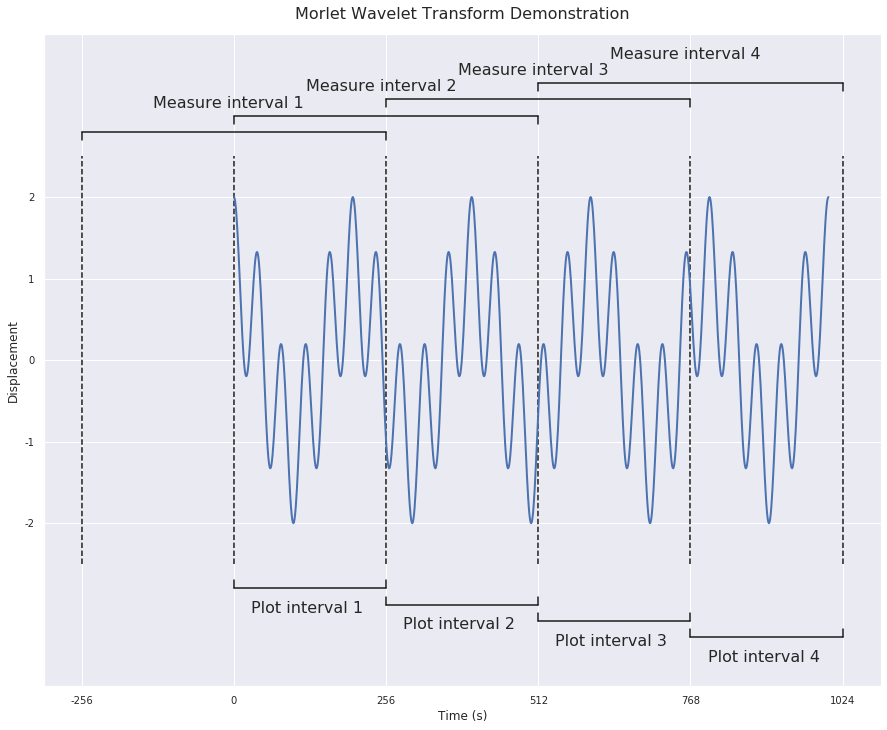

In [26]:
start = 0
end = 10 * np.pi
N = 1001

f_low = 1
f_high = 5

time = np.linspace(start, end, N)
low_frequency_time_series = np.cos(f_low * time)
high_frequency_time_series = np.cos(f_high * time)
time_series = low_frequency_time_series + high_frequency_time_series

n = 512
hann_window = sp.signal.get_window(window='hann', Nx=n + 1, fftbins=False)

extended_time_series = np.empty(1001 + 24 + 256)
extended_time_series[:] = np.nan
ext_time_series = extended_time_series.copy()
ext_time_series[256:1257] = time_series
ext_time = np.linspace(end * (-256 / 1000), end * (1024 / 1000), 1001 + 24 + 256)

extended_time_series_1 = extended_time_series.copy()
extended_time_series_1[:513] = ext_time_series[:513] * hann_window

extended_time_series_2 = extended_time_series.copy()
extended_time_series_2[256:769] = ext_time_series[256:769] * hann_window

ax = plt.subplot(111)
plt.plot(time, time_series, linewidth=2)
plt.title('Morlet Wavelet Transform Demonstration', fontsize=16, pad=15)
plt.xlabel('Time (s)', fontsize=12)
plt.xticks((end * (-256 / 1000), 0, end * (256 / 1000), end * (512 / 1000), end * (768 / 1000), end * (1024 / 1000)),
           ('-256', '0', '256', '512', '768', '1024'), fontsize=10)
for i in [end * (-256 / 1000), 0, end * (256 / 1000), end * (512 / 1000), end * (768 / 1000), end * (1024 / 1000)]:
    plt.plot(i * np.ones(101), np.linspace(-2.5, 2.5, 101), 'k--', zorder=1)
for j in [end * (-256 / 1000), 0, end * (256 / 1000), end * (512 / 1000)]:
    plt.plot()
jump = 0.2
x1 = end * (-256 / 1000)
x2 = end * (256 / 1000)
x1_lower = 0
interval = 1
for k in [end * (-256 / 1000), 0, end * (256 / 1000), end * (512 / 1000)]:
    plt.plot(np.linspace(k, k + end * (512 / 1000), 101), 2.6 + jump * np.ones(101), 'k-')
    plt.plot(x1 * np.ones(101), np.linspace(2.6 + jump, 2.6 + jump - 0.1, 101), 'k-')
    plt.plot(x2 * np.ones(101), np.linspace(2.6 + jump, 2.6 + jump - 0.1, 101), 'k-')

    plt.plot(np.linspace(k + end * (256 / 1000), k + end * (512 / 1000), 101), -2.6 - jump * np.ones(101),
             'k-')
    plt.plot(x1_lower * np.ones(101), np.linspace(-2.6 - jump, -2.6 - jump + 0.1, 101), 'k-')
    plt.plot(x2 * np.ones(101), np.linspace(-2.6 - jump, -2.6 - jump + 0.1, 101), 'k-')

    plt.text(x1 + 2 * np.pi - 2.5, 2.6 + jump + 0.3, f'Measure interval {interval}', fontsize=16)
    plt.text(x1_lower + 0.9, -2.6 - jump - 0.3, f'Plot interval {interval}', fontsize=16)
    x1 += end * (256 / 1000)
    x2 += end * (256 / 1000)
    x1_lower += end * (256 / 1000)
    jump += 0.2
    interval += 1
plt.ylim(-4, 4)
plt.ylabel('Displacement', fontsize=12)
plt.yticks((-2, -1, 0, 1, 2), ('-2', '-1', '0', '1', '2'), fontsize=10)
plt.show()

## Frequencies are Estimated using convolution of these wavelet packets

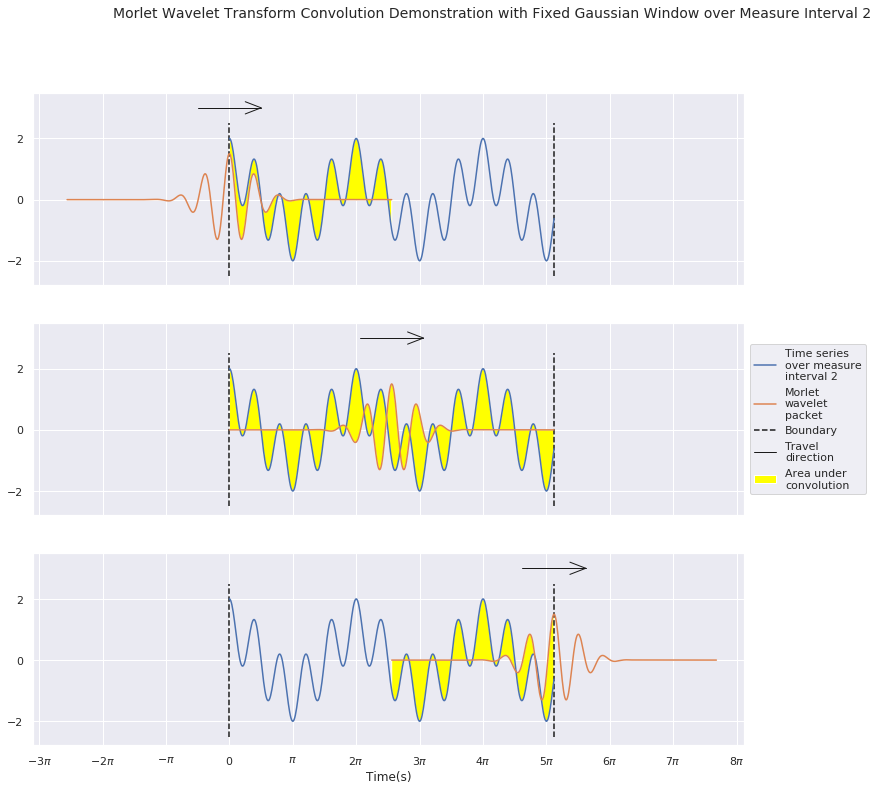

In [28]:
mor_window = 2 * morlet_window(512, (13 * (2 * np.pi) / 10))

left_2_1 = 256
right_2_1 = 513
left_2_2 = 0
right_2_2 = 257

left_3 = 0
right_3 = 513

left_4_1 = 256
right_4_1 = 513
left_4_2 = 0
right_4_2 = 257

fig, axs = plt.subplots(3, 1)
plt.suptitle('Morlet Wavelet Transform Convolution Demonstration with Fixed Gaussian Window over Measure Interval 2', fontsize=14)
axs[0].plot(time[:513], time_series[:513], label=textwrap.fill('Time series over measure interval 2', 12))
axs[0].plot(-time[:513] + time[256], mor_window, label=textwrap.fill('Morlet wavelet packet', 10))
axs[0].fill(np.hstack((time[left_2_2:right_2_2], time[left_2_2:right_2_2][::-1])),
            np.hstack((time_series[left_2_2:right_2_2], mor_window[left_2_1:right_2_1][::-1])),
            "yellow", label=textwrap.fill('Area under convolution', 12))
axs[0].set_xlim(-3.1 * np.pi, time[512] + 3 * np.pi)
axs[0].set_xticks([0])
axs[0].set_xticklabels([' '])
axs[0].set_xticks([-3 * np.pi, -2 * np.pi, -1 * np.pi, 0, 1 * np.pi, 2 * np.pi, 3 * np.pi,
                   4 * np.pi, 5 * np.pi, 6 * np.pi, 7 * np.pi, 8 * np.pi])
axs[0].set_xticklabels([' ', ' ', ' ', ' ', ' ', ' ', ' ',
                        ' ', ' ', ' ', ' ', ' '])
axs[0].set_yticks([-2, 0, 2])
axs[0].plot(10 * np.pi * (0 / 1000) * np.ones(101), np.linspace(-2.5, 2.5, 101), 'k--', zorder=1)
axs[0].plot(10 * np.pi * (512 / 1000) * np.ones(101), np.linspace(-2.5, 2.5, 101), 'k--', zorder=1, label='Boundary')
axs[0].plot(np.linspace(-np.pi / 2, np.pi / 2, 101), 3 * np.ones(101), 'k-', linewidth=1)
axs[0].plot(np.linspace(np.pi / 4, np.pi / 2, 101), np.linspace(3.2, 3, 101), 'k-', linewidth=1)
axs[0].plot(np.linspace(np.pi / 4, np.pi / 2, 101), np.linspace(2.8, 3, 101), 'k-', linewidth=1,
            label=textwrap.fill('Travel direction', 10))

box_0 = axs[0].get_position()
axs[0].set_position([box_0.x0 - 0.05, box_0.y0, box_0.width * 0.85, box_0.height])
axs[0].legend(loc='center left', bbox_to_anchor=(1, -0.70))

axs[1].plot(time[:513], time_series[:513])
axs[1].plot(-time[:513] + time[512], mor_window)
axs[1].fill(np.hstack((time[left_3:right_3], (-time[:513] + time[512])[left_3:right_3])),
            np.hstack((time_series[left_3:right_3], mor_window[left_3:right_3])),
            "yellow")
axs[1].set_xlim(-3.1 * np.pi, time[512] + 3 * np.pi)
axs[1].set_xticks([-3 * np.pi, -2 * np.pi, -1 * np.pi, 0, 1 * np.pi, 2 * np.pi, 3 * np.pi,
                   4 * np.pi, 5 * np.pi, 6 * np.pi, 7 * np.pi, 8 * np.pi])
axs[1].set_xticklabels([' ', ' ', ' ', ' ', ' ', ' ', ' ',
                        ' ', ' ', ' ', ' ', ' '])
axs[1].set_yticks([-2, 0, 2])
axs[1].plot(10 * np.pi * (0 / 1000) * np.ones(101), np.linspace(-2.5, 2.5, 101), 'k--', zorder=1)
axs[1].plot(10 * np.pi * (512 / 1000) * np.ones(101), np.linspace(-2.5, 2.5, 101), 'k--', zorder=1)
axs[1].plot(np.linspace(10 * np.pi * (206 / 1000), 10 * np.pi * (306 / 1000), 101), 3 * np.ones(101), 'k-', linewidth=1)
axs[1].plot(np.linspace(10 * np.pi * (281 / 1000), 10 * np.pi * (306 / 1000), 101), np.linspace(3.2, 3, 101), 'k-', linewidth=1)
axs[1].plot(np.linspace(10 * np.pi * (281 / 1000), 10 * np.pi * (306 / 1000), 101), np.linspace(2.8, 3, 101), 'k-', linewidth=1)

box_0 = axs[1].get_position()
axs[1].set_position([box_0.x0 - 0.05, box_0.y0, box_0.width * 0.85, box_0.height])

axs[2].plot(time[:513], time_series[:513])
axs[2].plot(-time[:513] + time[768], mor_window)
axs[2].fill(np.hstack((time[left_4_1:right_4_1], time[left_4_1:right_4_1][::-1])),
            np.hstack((time_series[left_4_1:right_4_1], mor_window[left_4_2:right_4_2][::-1])),
            "yellow")
axs[2].set_xlim(-3.1 * np.pi, time[512] + 3 * np.pi)
axs[2].set_xticks([-3 * np.pi, -2 * np.pi, -1 * np.pi, 0, 1 * np.pi, 2 * np.pi, 3 * np.pi,
                   4 * np.pi, 5 * np.pi, 6 * np.pi, 7 * np.pi, 8 * np.pi])
axs[2].set_xticklabels([r'$-3\pi$', r'$-2\pi$', r'$-\pi$', '$0$', r'$\pi$', r'$2\pi$', r'$3\pi$',
                        r'$4\pi$', r'$5\pi$', r'$6\pi$', r'$7\pi$', r'$8\pi$'])
axs[2].set_yticks([-2, 0, 2])
axs[2].plot(10 * np.pi * (0 / 1000) * np.ones(101), np.linspace(-2.5, 2.5, 101), 'k--', zorder=1)
axs[2].plot(10 * np.pi * (512 / 1000) * np.ones(101), np.linspace(-2.5, 2.5, 101), 'k--', zorder=1)
axs[2].plot(np.linspace(10 * np.pi * (462 / 1000), 10 * np.pi * (562 / 1000), 101), 3 * np.ones(101), 'k-', linewidth=1)
axs[2].plot(np.linspace(10 * np.pi * (537 / 1000), 10 * np.pi * (562 / 1000), 101), np.linspace(3.2, 3, 101), 'k-', linewidth=1)
axs[2].plot(np.linspace(10 * np.pi * (537 / 1000), 10 * np.pi * (562 / 1000), 101), np.linspace(2.8, 3, 101), 'k-', linewidth=1)
axs[2].set_xlabel('Time(s)')

box_0 = axs[2].get_position()
axs[2].set_position([box_0.x0 - 0.05, box_0.y0, box_0.width * 0.85, box_0.height])

plt.show()

## Morlet Wavlet Spectrum

### Defined functions

In [29]:
def morlet_window_adjust(width, sigma, cycles, significance):

    # adjustable wavelet where 'cycles' and 'significance' adjusts Gaussian window relative to cycles in wavelet
    # this assists by improving frequency resolution at low frequencies (at the expense of low time resolution)
    # improves time resolution at high frequencies (at the expense of low frequency resolution)

    # Definition - https://en.wikipedia.org/wiki/Morlet_wavelet
    c_pi = (1 + np.exp(- sigma ** 2) - 2 * np.exp(- 0.75 * sigma ** 2)) ** (-1 / 2)
    t = (np.arange(width + 1) - (width / 2)) * (10 / width)  # domain of [-5, 5]
    wavelet = c_pi * (np.pi ** (-1 / 4)) * (np.exp(1j * sigma * t) - np.exp(- (1 / 2) * sigma ** 2))
    output = np.exp(- (1 / 2) * (((significance / 5) / (cycles / (sigma * (10 / (2 * np.pi))))) * t) ** 2) * wavelet.real

    return output


def morlet_wavelet_custom(time, signal, window_width=256, adjust=True, cycles=50, significance=3):
    

    # how much must be added to create an integer multiple of window length
    addition = int(int(window_width / 2) - int((len(signal) + window_width) % int(window_width / 2)))

    # integer multiple of window length
    signal_new = np.hstack((np.zeros(int(window_width / 2)), signal, np.zeros(int(window_width / 2 + addition))))

    # storage of windowed Morlet transform
    z = np.zeros((int(len(signal_new) / (window_width / 2) - 1), int((window_width / 2) + 1)))

    # calculate sampling rate for frequency
    sampling_rate = len(time) / (time[-1] - time[0])
    # sampling_rate = len(time) / np.pi

    for row in range(np.shape(z)[0]):
        for col in range(np.shape(z)[1]):

            # This takes advantage of the relationship between Fourier transform and convolution
            # Rather than convoluting the Morlet wavelet and the signal
            # Fourier transform Morlet wavelet and section of signal
            # Then multiply them together and inverse Fourier transform the product

            # Fourier transform window of signal
            temp_z = np.fft.fft(signal_new[int(row * (window_width / 2)):int((row + 2) * (window_width / 2))],
                                n=window_width)
            # calculate Morlet window function
            if adjust:
                if col == 0:
                    window_morlet = np.zeros(window_width)
                else:
                    window_morlet = morlet_window_adjust(window_width, (col * (2 * np.pi) / 10), cycles, significance)[:-1]
            else:
                window_morlet = morlet_window(window_width, (col * (2 * np.pi) / 10))[:-1]
            # Fourier transform Morlet window function
            fft_window_morlet = np.abs(np.fft.fft(window_morlet))
            # multiply onto Fourier transformed signal
            temp_z *= fft_window_morlet
            # normalise Morlet wavelets in frequency spectrum - not as important with fixed window
            temp_z *= (1 / np.max(fft_window_morlet))
            # inverse Fourier transform the product
            temp_z = sp.fft.ifft(temp_z, n=window_width)
            # fill appropriate z[row, col] value
            z[row, col] = sum(np.abs(temp_z))

    z = np.transpose(z)
    # calculate frequency vector
    f = np.linspace(0, (sampling_rate / 2), int(window_width / 2 + 1))
    # calculate time vector
    # t = np.linspace(0, time[-1] * ((len(signal) + addition) / (len(signal))), int(len(signal_new) / (window_width / 2) - 1))
    # new time vector
    t = np.linspace(time[0], time[-1] + (time[-1] - time[0]) * (addition / len(signal)),
                    int(len(signal_new) / (window_width / 2) - 1))
    z[0, :] = 0

    return t, f, z

### Resulting Hilbert Spectrum

/home/cole/miniconda3/envs/emd/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/cole/miniconda3/envs/emd/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  


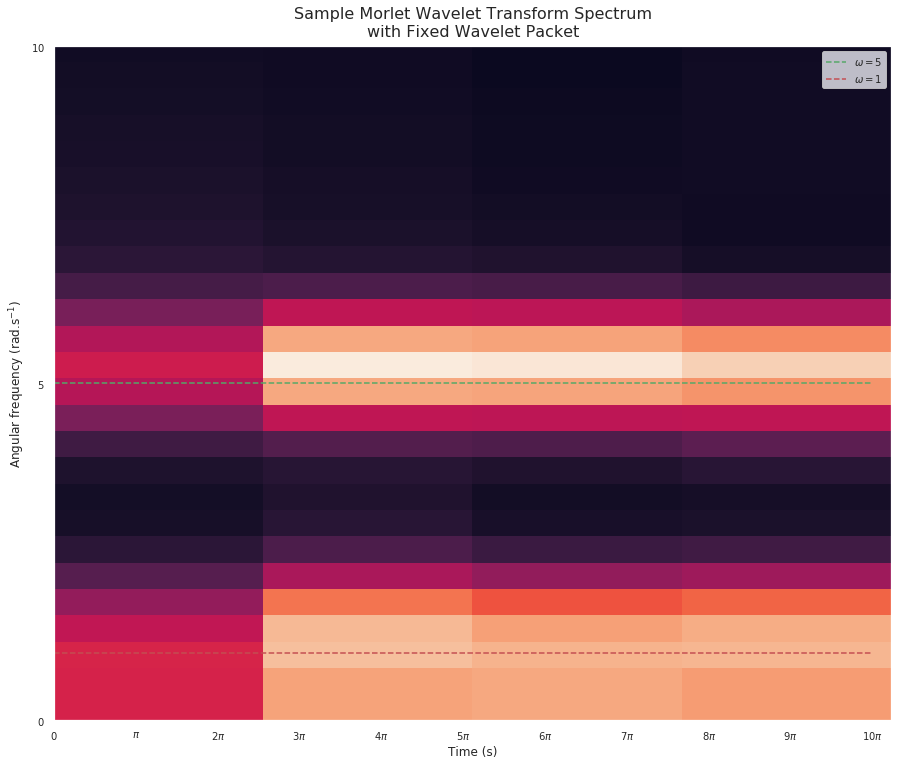

In [32]:
t_custom, f_custom, z_custom = morlet_wavelet_custom(time=time, signal=time_series, window_width=512,
                                                     adjust=False, cycles=50, significance=3)
z_custom[0, :] = z_custom[1, :]

ax = plt.subplot(111)
plt.gcf().subplots_adjust(bottom=0.10)
plt.pcolormesh(t_custom, f_custom, np.abs(z_custom), vmin=0, vmax=np.max(np.max(np.abs(z_custom))))
plt.plot(np.linspace(0, time[-1], 1000), (5 / (2 * np.pi)) * np.ones(1000), 'g--', label=r'$ \omega = 5 $')
plt.plot(np.linspace(0, time[-1], 1000), (1 / (2 * np.pi)) * np.ones(1000), 'r--', label=r'$ \omega = 1 $')
plt.title(textwrap.fill('Sample Morlet Wavelet Transform Spectrum with Fixed Wavelet Packet', 40), fontsize=16, pad=10)
plt.ylabel('Angular frequency (rad.s$^{-1}$)', fontsize=12)
plt.xlabel('Time (s)', fontsize=12)
plt.xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi,
            6 * np.pi, 7 * np.pi, 8 * np.pi, 9 * np.pi, 10 * np.pi],
           ['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$', r'$5\pi$',
            r'$6\pi$', r'$7\pi$', r'$8\pi$', r'$9\pi$', r'$10\pi$'], fontsize=10)
plt.ylim(0, 10 / (2 * np.pi))
plt.yticks([0, 5 / (2 * np.pi), 10 / (2 * np.pi)], ['$0$', '$5$', '$10$'], fontsize=10)
plt.legend(loc='upper right', fontsize=10)
plt.show()

### Define Adjustable Morlet Window Function

In [31]:
def morlet_window_adjust(width, sigma, cycles, significance):

    c_pi = (1 + np.exp(- sigma ** 2) - 2 * np.exp(- 0.75 * sigma ** 2)) ** (-1 / 2)
    x = (np.arange(width + 1) - (width / 2)) * (10 / width)
    wavelet = c_pi * (np.pi ** (-1 / 4)) * (np.exp(1j * sigma * x) - np.exp(- (1 / 2) * sigma ** 2))
    output = np.exp(- (((significance / 5) / (cycles / (sigma * (10 / (2 * np.pi))))) * x) ** 2) * wavelet.real
    return output

### Plot some Morlet Wavelet Packets (Adjsutable Window Width)

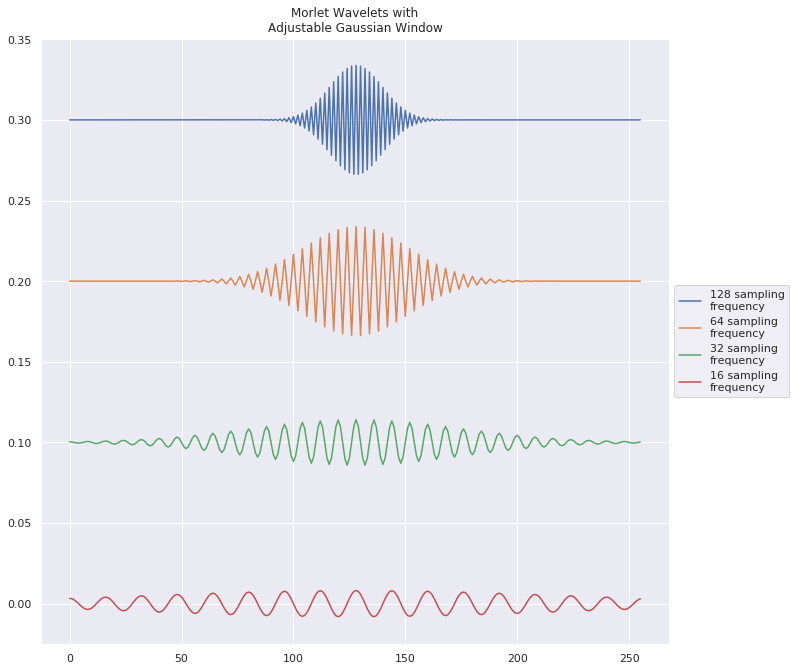

In [33]:
window_morlet_128 = morlet_window_adjust(window_width, (128 * (2 * np.pi) / 10), 50, 3)
window_morlet_128 = window_morlet_128[:-1] / np.sum(np.abs(window_morlet_128[:-1]))
window_morlet_64 = morlet_window_adjust(window_width, (64 * (2 * np.pi) / 10), 50, 3)
window_morlet_64 = window_morlet_64[:-1] / np.sum(np.abs(window_morlet_64[:-1]))
window_morlet_32 = morlet_window_adjust(window_width, (32 * (2 * np.pi) / 10), 50, 3)
window_morlet_32 = window_morlet_32[:-1] / np.sum(np.abs(window_morlet_32[:-1]))
window_morlet_16 = morlet_window_adjust(window_width, (16 * (2 * np.pi) / 10), 50, 3)
window_morlet_16 = window_morlet_16[:-1] / np.sum(np.abs(window_morlet_16[:-1]))

ax = plt.subplot(111)
plt.gcf().subplots_adjust(bottom=0.10)
plt.plot(range(256), window_morlet_128 + 0.3, label=textwrap.fill('128 sampling frequency', 15))
plt.plot(range(256), window_morlet_64 + 0.2, label=textwrap.fill('64 sampling frequency', 15))
plt.plot(range(256), window_morlet_32 + 0.1, label=textwrap.fill('32 sampling frequency', 15))
plt.plot(range(256), window_morlet_16 + 0.0, label=textwrap.fill('16 sampling frequency', 15))
plt.title(textwrap.fill('Morlet Wavelets with Adjustable Gaussian Window', 30))

box_0 = ax.get_position()
ax.set_position([box_0.x0, box_0.y0 + 0.05, box_0.width * 0.75, box_0.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Frequencies are Estimated using convolution of these (adjsutable) wavelet packets

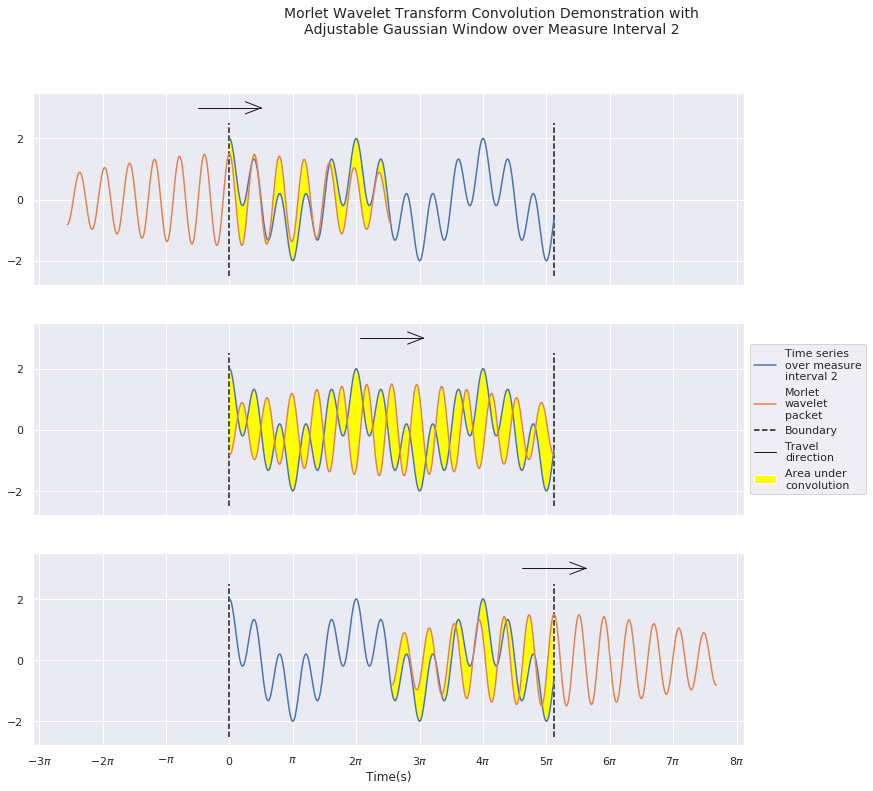

In [34]:
mor_window = 2 * morlet_window_adjust(512, (13 * (2 * np.pi) / 10), cycles=50, significance=3)

left_2_1 = 256
right_2_1 = 513
left_2_2 = 0
right_2_2 = 257

left_3 = 0
right_3 = 513

left_4_1 = 256
right_4_1 = 513
left_4_2 = 0
right_4_2 = 257

fig, axs = plt.subplots(3, 1)
plt.suptitle(textwrap.fill('Morlet Wavelet Transform Convolution Demonstration with Adjustable Gaussian Window over Measure Interval 2', 55), fontsize=14)
axs[0].plot(time[:513], time_series[:513], label=textwrap.fill('Time series over measure interval 2', 12))
axs[0].plot(-time[:513] + time[256], mor_window, label=textwrap.fill('Morlet wavelet packet', 10))
axs[0].fill(np.hstack((time[left_2_2:right_2_2], time[left_2_2:right_2_2][::-1])),
            np.hstack((time_series[left_2_2:right_2_2], mor_window[left_2_1:right_2_1][::-1])),
            "yellow", label=textwrap.fill('Area under convolution', 12))
axs[0].set_xlim(-3.1 * np.pi, time[512] + 3 * np.pi)
axs[0].set_xticks([0])
axs[0].set_xticklabels([' '])
axs[0].set_xticks([-3 * np.pi, -2 * np.pi, -1 * np.pi, 0, 1 * np.pi, 2 * np.pi, 3 * np.pi,
                   4 * np.pi, 5 * np.pi, 6 * np.pi, 7 * np.pi, 8 * np.pi])
axs[0].set_xticklabels([' ', ' ', ' ', ' ', ' ', ' ', ' ',
                        ' ', ' ', ' ', ' ', ' '])
axs[0].set_yticks([-2, 0, 2])
axs[0].plot(10 * np.pi * (0 / 1000) * np.ones(101), np.linspace(-2.5, 2.5, 101), 'k--', zorder=1)
axs[0].plot(10 * np.pi * (512 / 1000) * np.ones(101), np.linspace(-2.5, 2.5, 101), 'k--', zorder=1, label='Boundary')
axs[0].plot(np.linspace(-np.pi / 2, np.pi / 2, 101), 3 * np.ones(101), 'k-', linewidth=1)
axs[0].plot(np.linspace(np.pi / 4, np.pi / 2, 101), np.linspace(3.2, 3, 101), 'k-', linewidth=1)
axs[0].plot(np.linspace(np.pi / 4, np.pi / 2, 101), np.linspace(2.8, 3, 101), 'k-', linewidth=1,
            label=textwrap.fill('Travel direction', 10))

box_0 = axs[0].get_position()
axs[0].set_position([box_0.x0 - 0.05, box_0.y0, box_0.width * 0.85, box_0.height])
axs[0].legend(loc='center left', bbox_to_anchor=(1, -0.70))

axs[1].plot(time[:513], time_series[:513])
axs[1].plot(-time[:513] + time[512], mor_window)
axs[1].fill(np.hstack((time[left_3:right_3], (-time[:513] + time[512])[left_3:right_3])),
            np.hstack((time_series[left_3:right_3], mor_window[left_3:right_3])),
            "yellow")
axs[1].set_xlim(-3.1 * np.pi, time[512] + 3 * np.pi)
axs[1].set_xticks([-3 * np.pi, -2 * np.pi, -1 * np.pi, 0, 1 * np.pi, 2 * np.pi, 3 * np.pi,
                   4 * np.pi, 5 * np.pi, 6 * np.pi, 7 * np.pi, 8 * np.pi])
axs[1].set_xticklabels([' ', ' ', ' ', ' ', ' ', ' ', ' ',
                        ' ', ' ', ' ', ' ', ' '])
axs[1].set_yticks([-2, 0, 2])
axs[1].plot(10 * np.pi * (0 / 1000) * np.ones(101), np.linspace(-2.5, 2.5, 101), 'k--', zorder=1)
axs[1].plot(10 * np.pi * (512 / 1000) * np.ones(101), np.linspace(-2.5, 2.5, 101), 'k--', zorder=1)
axs[1].plot(np.linspace(10 * np.pi * (206 / 1000), 10 * np.pi * (306 / 1000), 101), 3 * np.ones(101), 'k-', linewidth=1)
axs[1].plot(np.linspace(10 * np.pi * (281 / 1000), 10 * np.pi * (306 / 1000), 101), np.linspace(3.2, 3, 101), 'k-', linewidth=1)
axs[1].plot(np.linspace(10 * np.pi * (281 / 1000), 10 * np.pi * (306 / 1000), 101), np.linspace(2.8, 3, 101), 'k-', linewidth=1)

box_0 = axs[1].get_position()
axs[1].set_position([box_0.x0 - 0.05, box_0.y0, box_0.width * 0.85, box_0.height])

axs[2].plot(time[:513], time_series[:513])
axs[2].plot(-time[:513] + time[768], mor_window)
axs[2].fill(np.hstack((time[left_4_1:right_4_1], time[left_4_1:right_4_1][::-1])),
            np.hstack((time_series[left_4_1:right_4_1], mor_window[left_4_2:right_4_2][::-1])),
            "yellow")
axs[2].set_xlim(-3.1 * np.pi, time[512] + 3 * np.pi)
axs[2].set_xticks([-3 * np.pi, -2 * np.pi, -1 * np.pi, 0, 1 * np.pi, 2 * np.pi, 3 * np.pi,
                   4 * np.pi, 5 * np.pi, 6 * np.pi, 7 * np.pi, 8 * np.pi])
axs[2].set_xticklabels([r'$-3\pi$', r'$-2\pi$', r'$-\pi$', '$0$', r'$\pi$', r'$2\pi$', r'$3\pi$',
                        r'$4\pi$', r'$5\pi$', r'$6\pi$', r'$7\pi$', r'$8\pi$'])
axs[2].set_yticks([-2, 0, 2])
axs[2].plot(10 * np.pi * (0 / 1000) * np.ones(101), np.linspace(-2.5, 2.5, 101), 'k--', zorder=1)
axs[2].plot(10 * np.pi * (512 / 1000) * np.ones(101), np.linspace(-2.5, 2.5, 101), 'k--', zorder=1)
axs[2].plot(np.linspace(10 * np.pi * (462 / 1000), 10 * np.pi * (562 / 1000), 101), 3 * np.ones(101), 'k-', linewidth=1)
axs[2].plot(np.linspace(10 * np.pi * (537 / 1000), 10 * np.pi * (562 / 1000), 101), np.linspace(3.2, 3, 101), 'k-', linewidth=1)
axs[2].plot(np.linspace(10 * np.pi * (537 / 1000), 10 * np.pi * (562 / 1000), 101), np.linspace(2.8, 3, 101), 'k-', linewidth=1)
axs[2].set_xlabel('Time(s)')

box_0 = axs[2].get_position()
axs[2].set_position([box_0.x0 - 0.05, box_0.y0, box_0.width * 0.85, box_0.height])

plt.show()

### Resulting Hilbert Spectrum with Adjustable Windows

/home/cole/miniconda3/envs/emd/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in double_scalars
/home/cole/miniconda3/envs/emd/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in multiply


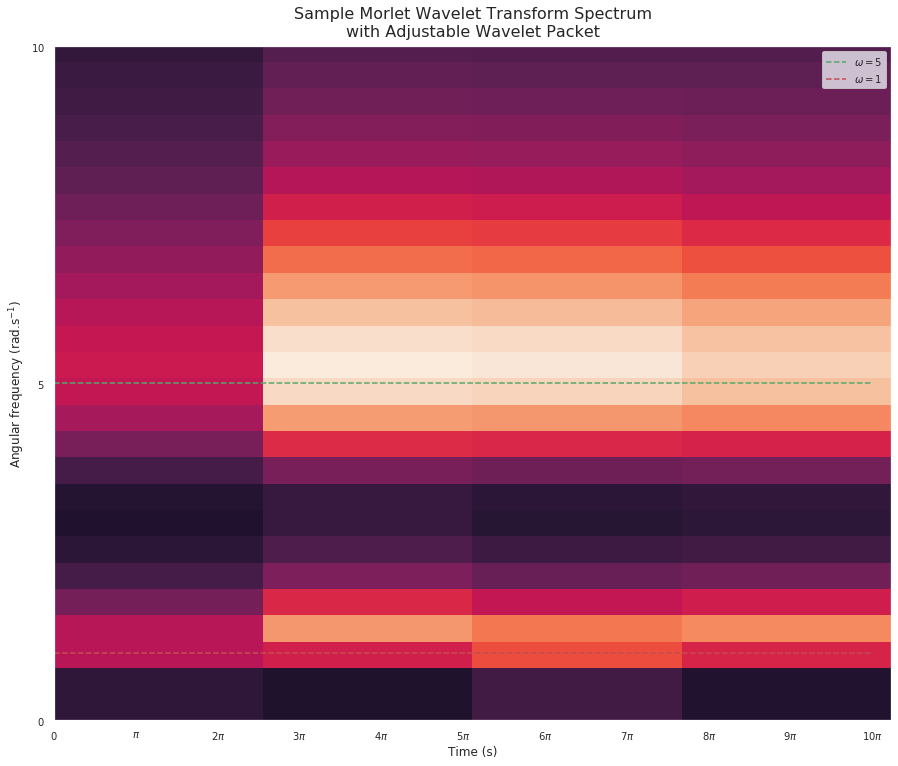

In [35]:
t_custom, f_custom, z_custom = morlet_wavelet_custom(time=time, signal=time_series, window_width=512,
                                                     adjust=True, cycles=5, significance=3)
z_custom[0, :] = z_custom[1, :]

ax = plt.subplot(111)
plt.gcf().subplots_adjust(bottom=0.10)
plt.pcolormesh(t_custom, f_custom, np.abs(z_custom), vmin=0, vmax=np.max(np.max(np.abs(z_custom))))
plt.plot(np.linspace(0, time[-1], 1000), (5 / (2 * np.pi)) * np.ones(1000), 'g--', label=r'$ \omega = 5 $')
plt.plot(np.linspace(0, time[-1], 1000), (1 / (2 * np.pi)) * np.ones(1000), 'r--', label=r'$ \omega = 1 $')
plt.title(textwrap.fill('Sample Morlet Wavelet Transform Spectrum with Adjustable Wavelet Packet', 40),
          fontsize=16, pad=10)
plt.ylabel('Angular frequency (rad.s$^{-1}$)', fontsize=12)
plt.xlabel('Time (s)', fontsize=12)
plt.xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi,
            6 * np.pi, 7 * np.pi, 8 * np.pi, 9 * np.pi, 10 * np.pi],
           ['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$', r'$5\pi$',
            r'$6\pi$', r'$7\pi$', r'$8\pi$', r'$9\pi$', r'$10\pi$'], fontsize=10)
plt.ylim(0, 10 / (2 * np.pi))
plt.yticks([0, 5 / (2 * np.pi), 10 / (2 * np.pi)], ['$0$', '$5$', '$10$'], fontsize=10)
plt.legend(loc='upper right', fontsize=10)
plt.show()

### Note:
\
Using the adjustable Morlet wavelet packets one can increase the frequency resolution at lower frequencies and increase temporal resolution at higher frequencies.

## Empirical Mode Decomposition

In [36]:
import AdvEMDpy
from emd_hilbert import hilbert_spectrum, theta, omega

### Hilbert Spectrum

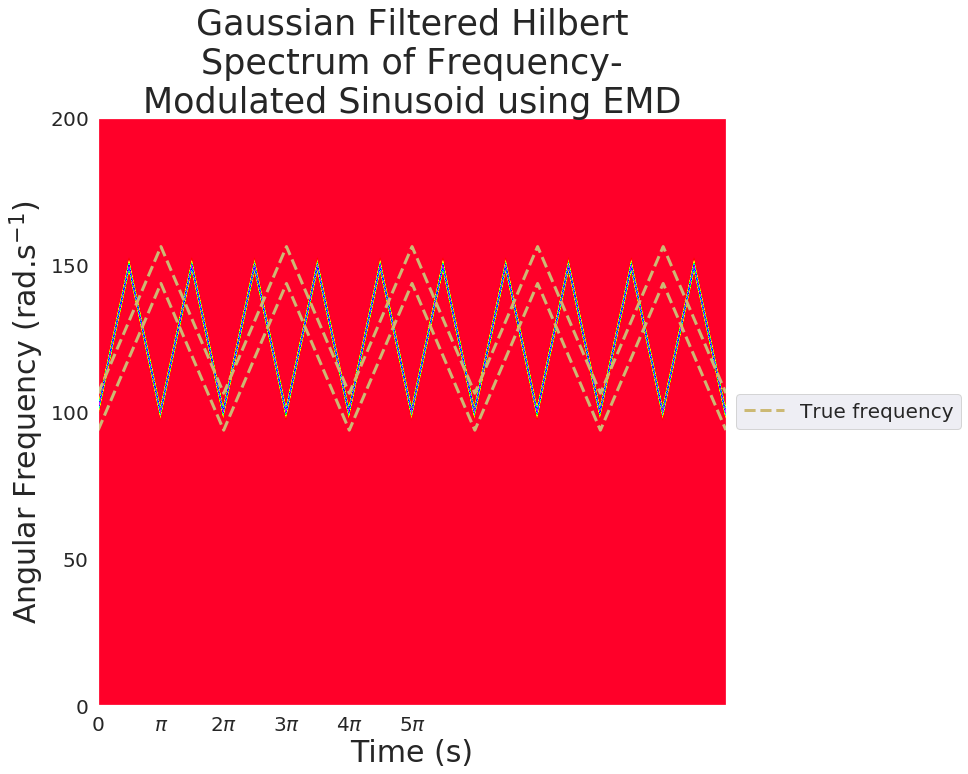

In [37]:
time_points = 10001
time = np.linspace(start, end, time_points)

modulated_time = frequency(time, np.pi, 100, 150)
modulated_time_series = np.cos(modulated_time)

imf_example = np.vstack((modulated_time_series, modulated_time_series, np.zeros_like(modulated_time_series)))
hs_example = np.vstack((np.sin(modulated_time), np.sin(modulated_time), np.sin(modulated_time)))
calculated_inst_freq = omega(time, theta(np.cos(modulated_time), np.sin(modulated_time)))
if_example = np.vstack((0 * time[:-1], calculated_inst_freq, 0 * time[:-1]))

hs_ouputs = hilbert_spectrum(time, imf_example, hs_example, if_example, max_frequency=200, plot=False)

ax = plt.subplot(111)
plt.title(textwrap.fill('Gaussian Filtered Hilbert Spectrum of Frequency-Modulated Sinusoid using EMD', 30), fontsize=35)
time_plot = np.linspace(start, end, 100001)
plt.plot(time_plot[:-11], freq[:-10] / (2 * np.pi) + 1, 'y--', linewidth=3)
plt.plot(time_plot[:-11], freq[:-10] / (2 * np.pi) - 1, 'y--', linewidth=3, label='True frequency')
x_hs, y, z = hs_ouputs
y = y / (2 * np.pi)
z_min, z_max = 0, np.abs(z).max()
ax.pcolormesh(x_hs, y, np.abs(z), cmap='gist_rainbow', vmin=z_min, vmax=z_max)
ax.set_xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi])
ax.set_xticklabels(['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$', r'$5\pi$'], fontsize=20)
plt.yticks([0, 50 / (2 * np.pi), 100 / (2 * np.pi), 150 / (2 * np.pi), 200 / (2 * np.pi)])  # convert to angular frequency
ax.set_yticklabels(['$0$', '$50$', '$100$', '$150$', '$200$'], fontsize=20)
plt.ylabel(r'Angular Frequency (rad.s$^{-1}$)', fontsize=30)
plt.xlabel('Time (s)', fontsize=30)

box_0 = ax.get_position()
ax.set_position([box_0.x0, box_0.y0 + 0.05, box_0.width * 0.75, box_0.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)
plt.rcParams['figure.figsize'] = [15, 12]
plt.show()

## Synthetic Examples

### Modulated Frequencies
\
example from:\
\
Coifman, R., Meyer, Y., & Wickerhauser, V. (1992). Wavelet analysis and signal processing. In Wavelets and their applications (p. 153-178).

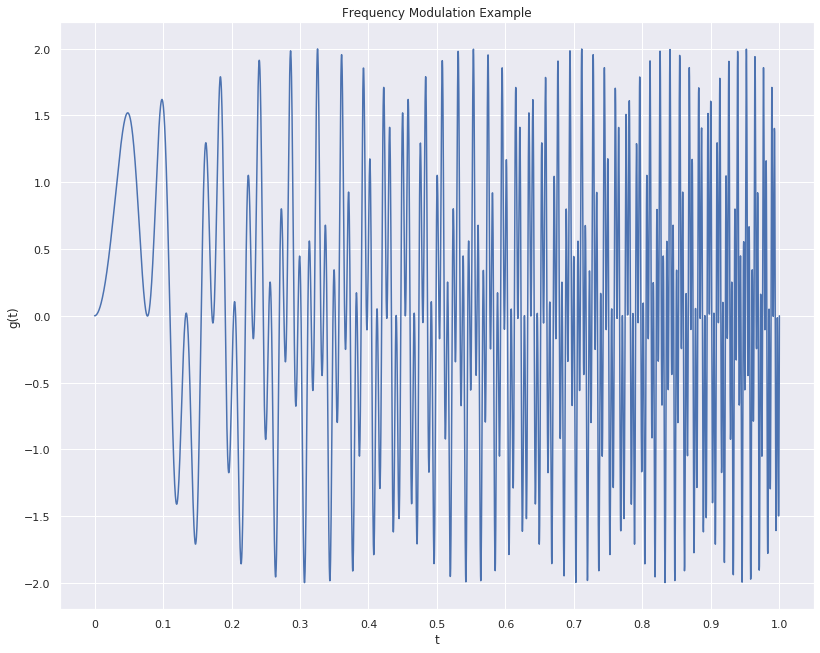

In [38]:
begin = 0
end = 1
points = int(7.5 * 512)
x = np.linspace(begin, end, points)

signal_1 = np.sin(250 * np.pi * x ** 2)
signal_2 = np.sin(80 * np.pi * x ** 2)

signal = signal_1 + signal_2

x_points = np.arange(0, 1.1, 0.1)
x_names = ['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']

plt.figure(2)
ax = plt.subplot(111)
plt.title('Frequency Modulation Example')
plt.plot(x, signal)
plt.xticks(x_points, x_names)
plt.ylabel('g(t)')
plt.xlabel('t')

box_0 = ax.get_position()
ax.set_position([box_0.x0 + 0.05, box_0.y0 + 0.05, box_0.width * 0.9, box_0.height * 0.9])
plt.show()

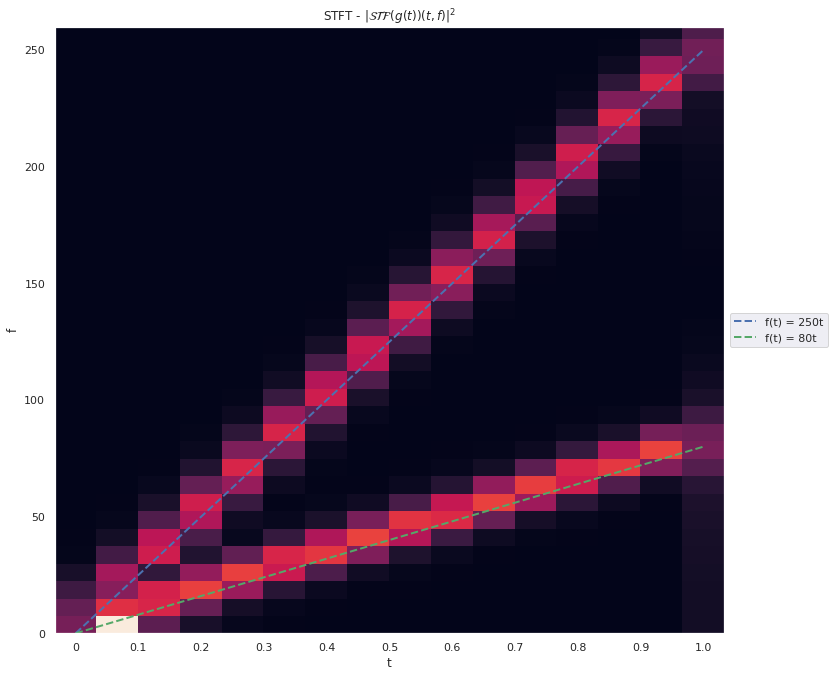

In [39]:
t_stft, f_stft, z_stft = stft_custom(x, signal, window_width=512, angular_frequency=False)

ax = plt.subplot(111)
plt.gcf().subplots_adjust(bottom=0.10)
plt.pcolormesh((t_stft - (1 / (3840 / 128))), f_stft, np.abs(z_stft), vmin=0, vmax=np.max(np.max(np.abs(z_stft))))
plt.plot(t_stft[:-1], 250 * t_stft[:-1], 'b--', label='f(t) = 250t', linewidth=2)
plt.plot(t_stft[:-1], 80 * t_stft[:-1], 'g--', label='f(t) = 80t', linewidth=2)
plt.title(r'STFT - $ |\mathcal{STF}(g(t))(t,f)|^2 $')
plt.ylabel('f')
plt.xlabel('t')
plt.xticks(x_points, x_names)
plt.ylim(0, 260)

box_0 = ax.get_position()
ax.set_position([box_0.x0 + 0.0125, box_0.y0 + 0.075, box_0.width * 0.8, box_0.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [35]:
from AdvEMDpy.AdvEMDpy import EMD

/home/cole/miniconda3/envs/emd/lib/python3.7/site-packages/AdvEMDpy/AdvEMDpy.py:1191: UserWarning: Recommended knots are subset of knot time points for discontinuity issues.
  warnings.warn('Recommended knots are subset of knot time points for discontinuity issues.')


IMF_11 Standard deviation STOPPING CRITERION NOT MET with sd = 119691.2
IMF_12 Standard deviation STOPPING CRITERION NOT MET with sd = 33868.81
IMF_13 Standard deviation STOPPING CRITERION NOT MET with sd = 2156.08
IMF_14 Standard deviation STOPPING CRITERION NOT MET with sd = 10561.28
IMF_15 ALL IMF CONDITIONS MET
IMF_21 Standard deviation STOPPING CRITERION NOT MET with sd = 1198.68
IMF_22 Standard deviation STOPPING CRITERION NOT MET with sd = 99043.79
IMF_23 Standard deviation STOPPING CRITERION NOT MET with sd = 569.21
IMF_24 Standard deviation STOPPING CRITERION NOT MET with sd = 285.36
IMF_25 Standard deviation STOPPING CRITERION NOT MET with sd = 54.57
IMF_26 Standard deviation STOPPING CRITERION NOT MET with sd = 2444.11
IMF_27 Standard deviation STOPPING CRITERION NOT MET with sd = 947.98
IMF_28 Standard deviation STOPPING CRITERION NOT MET with sd = 3059.71
IMF_29 ALL IMF CONDITIONS MET
IMF_31 Standard deviation STOPPING CRITERION NOT MET with sd = 33854894.34
IMF_32 ALL IMF

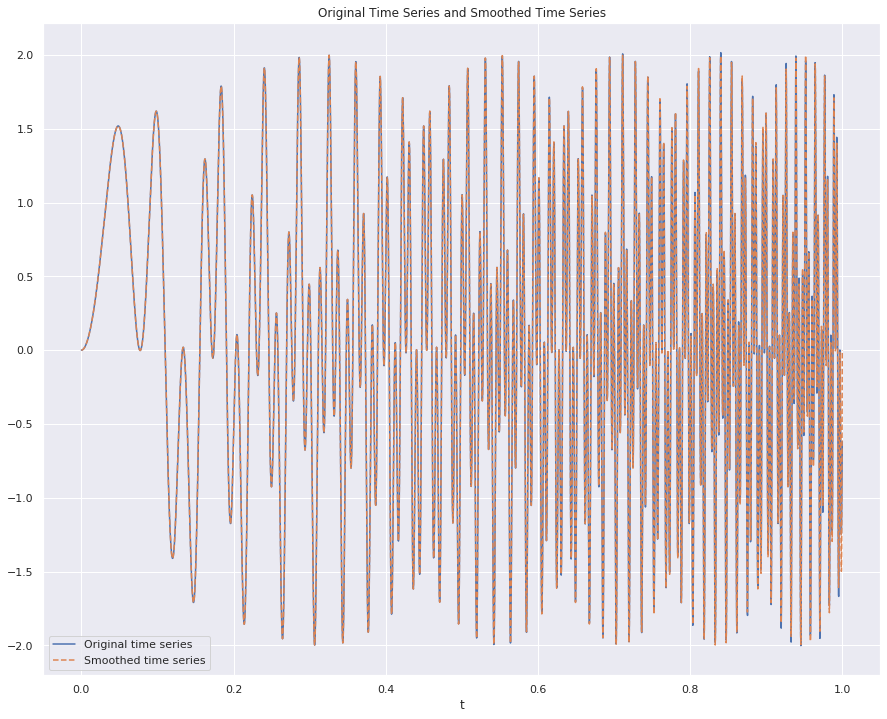

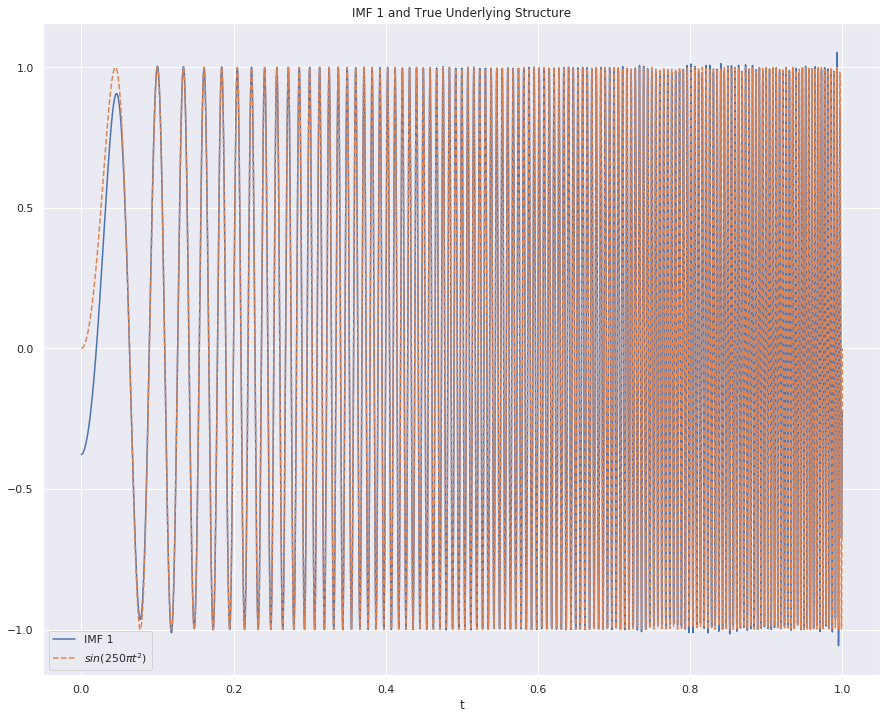

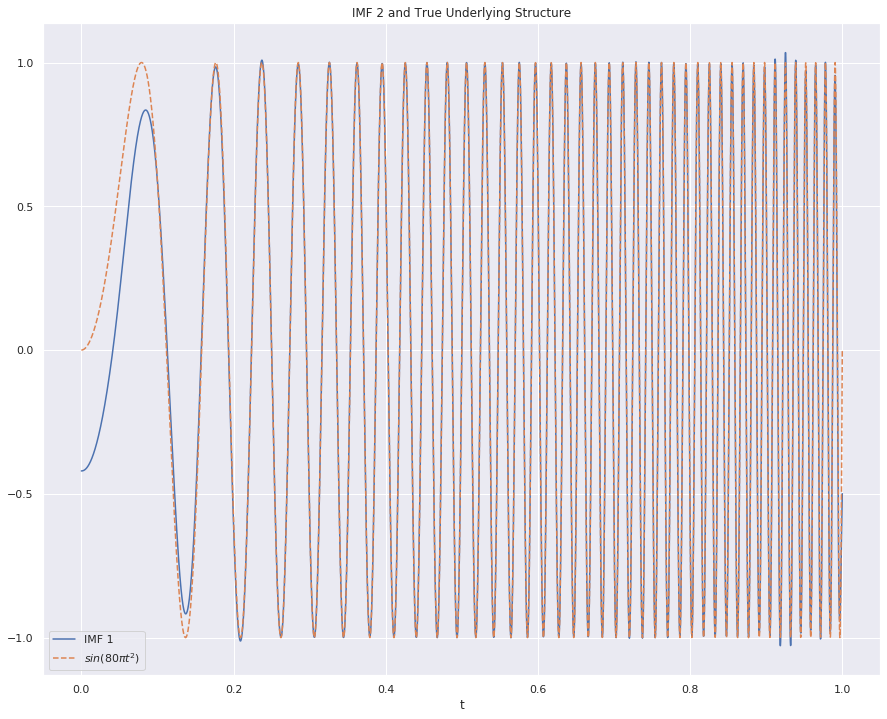

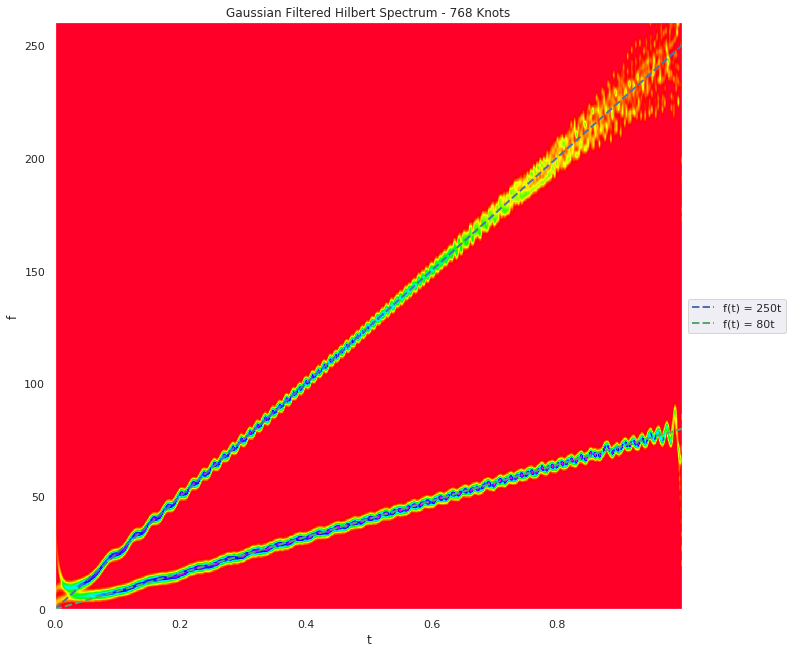

In [41]:
knots = np.linspace(begin, end, int(points / 5))
emd = EMD(time=x, time_series=signal)

imfs, hts, ifs, _, _, _, dtifs = emd.empirical_mode_decomposition(knots=knots, knot_time=x, matrix=True, max_internal_iter=20, mean_threshold=10, stopping_criterion_threshold=10, dtht=True)

for i in range(3):
    if i==0:
        plt.title('Original Time Series and Smoothed Time Series')
        plt.plot(x, imfs[i, :], label='Original time series')
        plt.plot(x, signal, '--', label='Smoothed time series')
        plt.legend(loc='lower left')
        plt.xlabel('t')
        plt.show()
    elif i==1:
        plt.title('IMF 1 and True Underlying Structure')
        plt.plot(x, imfs[i, :], label='IMF 1')
        plt.plot(x, signal_1, '--', label=r'$ sin(250\pi{t}^2) $')
        plt.legend(loc='lower left')
        plt.xlabel('t')
        plt.show()
    elif i==2:
        plt.title('IMF 2 and True Underlying Structure')
        plt.plot(x, imfs[i, :], label='IMF 1')
        plt.plot(x, signal_2, '--', label=r'$ sin(80\pi{t}^2) $')
        plt.legend(loc='lower left')
        plt.xlabel('t')
        plt.show()

hs_ouputs = hilbert_spectrum(x, imfs, hts, dtifs, max_frequency=260 * 2 * np.pi, plot=False, which_imfs=[1, 2])

x_hs_morlet, y_morlet, z_morlet = hs_ouputs
y_morlet = y_morlet / (2 * np.pi)

z_min, z_max = 0, np.abs(z_morlet).max()
fig, ax = plt.subplots()
ax.pcolormesh(x_hs_morlet, y_morlet, z_morlet, cmap='gist_rainbow', vmin=z_min, vmax=z_max)
plt.plot(t_stft, 250 * t_stft, 'b--', label='f(t) = 250t', linewidth=2)
plt.plot(t_stft, 80 * t_stft, 'g--', label='f(t) = 80t', linewidth=2)
ax.set_title(f'Gaussian Filtered Hilbert Spectrum - {int(points / 5)} Knots')
ax.set_xlabel('t')
ax.set_ylabel('f')
ax.axis([x_hs_morlet.min(), x_hs_morlet.max(), y_morlet.min(), y_morlet.max()])

box_0 = ax.get_position()
ax.set_position([box_0.x0, box_0.y0 + 0.05, box_0.width * 0.75, box_0.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Complex Structures

In [34]:
from scipy.integrate import odeint

### Duffing Equation
\
example from:\
\
N. Huang, Z. Shen, S. Long, M. Wu, H. Shih, Q. Zheng, N. Yen, C. Tung, and H. Liu. (1998). The empirical mode decomposition and the Hilbert spectrum for nonlinear and non-stationary time series analysis. Proceedings of the Royal Society of London A: Mathematical, Physical and Engineering Sciences, 454(1971), 903-995. doi: 10.1098/rspa.1998.0193

### Simple spring described by Hooke's Law

\begin{equation} \label{spring}
    \frac{d^2x(t)}{dt^2} + {\omega}x(t) = 0,
\end{equation}

### Specific case of Duffing Equation

\begin{equation} \label{Duffing_equation}
    \frac{d^2x(t)}{dt^2} + \Big(1 - x^2(t)\Big)x(t) = \frac{1}{10}\text{cos}\bigg(\frac{1}{25}2{\pi}t\bigg),
\end{equation}

### Set-Up of Duffing Equation

In [43]:
def duffing_equation(xy, ts):
    gamma = 0.1
    epsilon = 1
    omega = ((2 * np.pi) / 25)
    return [xy[1], xy[0] - epsilon * xy[0] ** 3 + gamma * np.cos(omega * ts)]


t = np.linspace(0, 150, 1501)
XY0 = [1, 1]
solution = odeint(duffing_equation, XY0, t)
x = solution[:, 0]
dxdt = solution[:, 1]

### Plot Displacement and Velocity

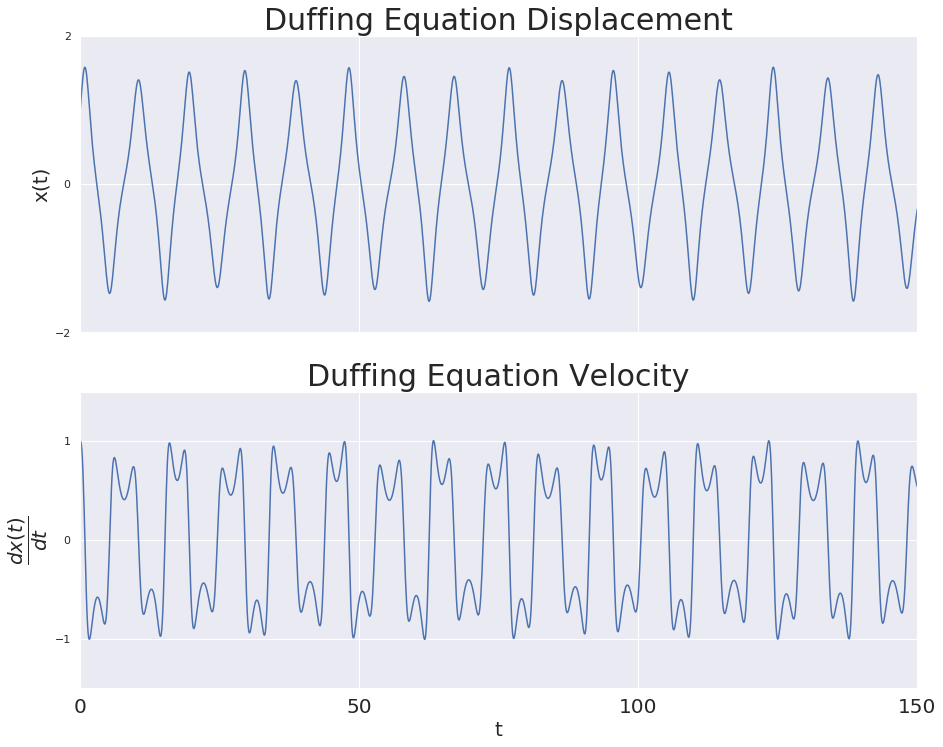

In [44]:
x_points = [0, 50, 100, 150]
x_names = {0, 50, 100, 150}
y_points_1 = [-2, 0, 2]
y_points_2 = [-1, 0, 1]

fig, axs = plt.subplots(2, 1)
plt.subplots_adjust(hspace=0.2)
axs[0].plot(t, x)
axs[0].set_title('Duffing Equation Displacement', fontsize=30)
axs[0].set_ylim([-2, 2])
axs[0].set_xlim([0, 150])

axs[1].plot(t, dxdt)
axs[1].set_title('Duffing Equation Velocity', fontsize=30)
axs[1].set_ylim([-1.5, 1.5])
axs[1].set_xlim([0, 150])

axis = 0
for ax in axs.flat:
    ax.label_outer()
    if axis == 0:
        ax.set_ylabel('x(t)', fontsize=20)
        ax.set_yticks(y_points_1)
    if axis == 1:
        ax.set_ylabel(r'$ \dfrac{dx(t)}{dt} $', fontsize=20)
        ax.set_xlabel('t', fontsize=20)
        ax.set_yticks(y_points_2)
    ax.set_xticks(x_points)
    ax.set_xticklabels(x_names, fontsize=20)
    axis += 1
plt.rcParams['figure.figsize'] = [15, 12]
plt.show()

### Short-Time Fourier Transform Spectrum

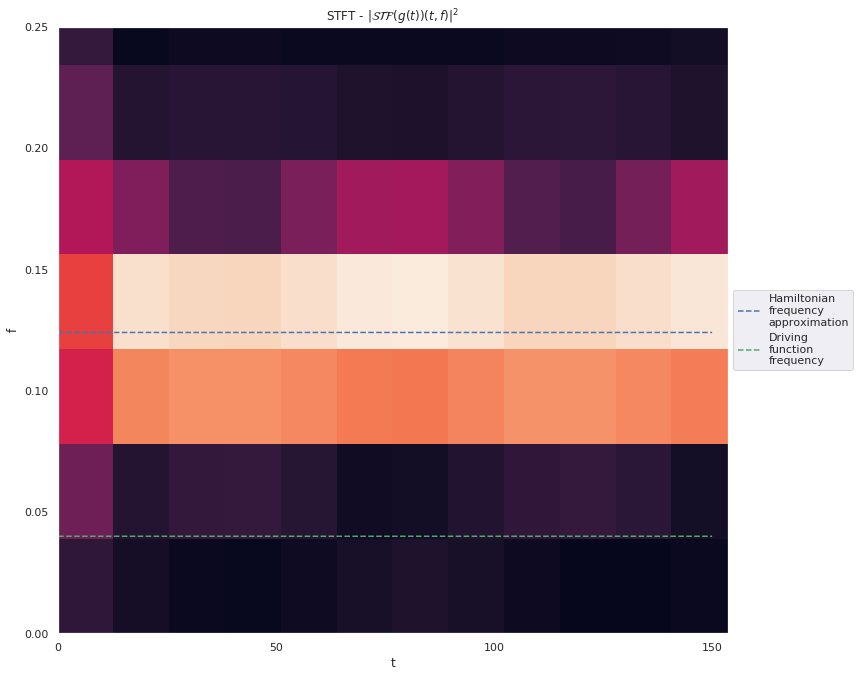

In [45]:
t_stft, f_stft, z_stft = stft_custom(t, x, window_width=256, angular_frequency=False)

ax = plt.subplot(111)
plt.gcf().subplots_adjust(bottom=0.10)
plt.pcolormesh((t_stft - (1 / (3840 / 128))), f_stft, np.abs(z_stft), vmin=0, vmax=np.max(np.max(np.abs(z_stft))))
plt.plot(t[:-1], 0.124 * np.ones_like(t[:-1]), '--', label=textwrap.fill('Hamiltonian frequency approximation', 15))
plt.plot(t[:-1], 0.04 * np.ones_like(t[:-1]), 'g--', label=textwrap.fill('Driving function frequency', 15))
plt.title(r'STFT - $ |\mathcal{STF}(g(t))(t,f)|^2 $')
plt.ylabel('f')
plt.xlabel('t')
plt.xticks(x_points, x_names)
plt.ylim(0, 0.25)

box_0 = ax.get_position()
ax.set_position([box_0.x0 + 0.0125, box_0.y0 + 0.075, box_0.width * 0.8, box_0.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Empirical Mode Decomposition

In [37]:
import AdvEMDPy
emd_duffing = AdvEMDpy.AdvEMDpy.EMD(time=t, time_series=x)
emd_duff, emd_ht_duff, emd_if_duff, _, _, _, _ = emd_duffing.empirical_mode_decomposition(verbose=False)

fig, axs = plt.subplots(2, 1)
plt.subplots_adjust(hspace=0.3)
axs[0].plot(t, emd_duff[1, :], label='AdvEMDpy')
axs[0].set_title('IMF 1')
axs[0].set_ylim([-2, 2])
axs[0].set_xlim([0, 150])

axs[1].plot(t, emd_duff[2, :], label='AdvEMDpy')
axs[1].plot(t, 0.1 * np.cos(0.04 * 2 * np.pi * t), '--', label=r'$0.1$cos$(0.08{\pi}t)$')
axs[1].set_title('IMF 2')
axs[1].set_ylim([-0.2, 0.4])
axs[1].set_xlim([0, 150])

axis = 0
for ax in axs.flat:
    ax.label_outer()
    if axis == 0:
        ax.set_ylabel(r'$\gamma_1(t)$')
        ax.set_yticks([-2, 0, 2])
    if axis == 1:
        ax.set_ylabel(r'$\gamma_2(t)$')
        ax.set_yticks([-0.2, 0, 0.2])
    box_0 = ax.get_position()
    ax.set_position([box_0.x0, box_0.y0, box_0.width * 0.85, box_0.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
    ax.set_xticks(x_points)
    ax.set_xticklabels(x_names)
    axis += 1
plt.rcParams['figure.figsize'] = [15, 12]
plt.show()

ModuleNotFoundError: No module named 'AdvEMDPy'

### Hilbert Spectrum

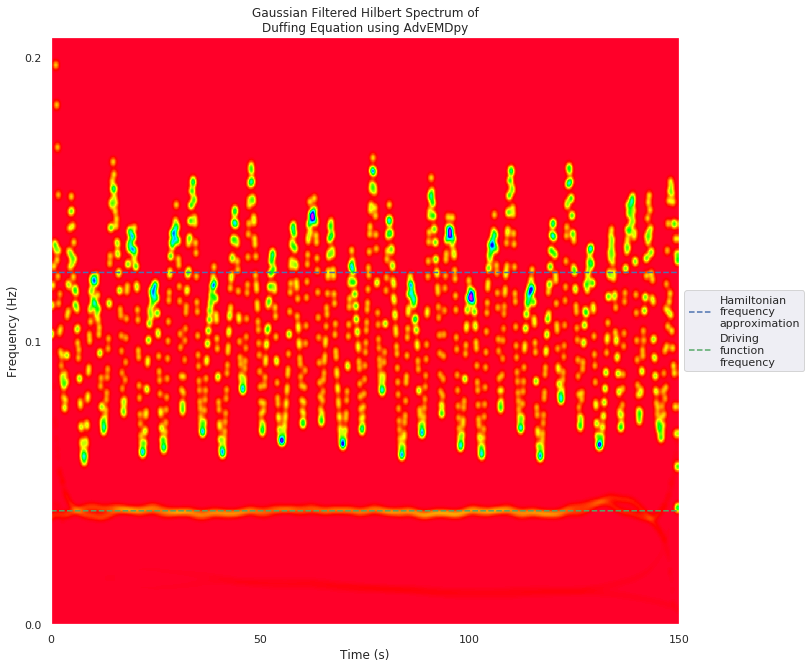

In [47]:
hs_ouputs = hilbert_spectrum(t, emd_duff, emd_ht_duff, emd_if_duff, max_frequency=1.3, plot=False)

ax = plt.subplot(111)
plt.title(textwrap.fill('Gaussian Filtered Hilbert Spectrum of Duffing Equation using AdvEMDpy', 40))
x_hs, y, z = hs_ouputs
y = y / (2 * np.pi)
z_min, z_max = 0, np.abs(z).max()
ax.pcolormesh(x_hs, y, np.abs(z), cmap='gist_rainbow', vmin=z_min, vmax=z_max)
plt.plot(t[:-1], 0.124 * np.ones_like(t[:-1]), '--', label=textwrap.fill('Hamiltonian frequency approximation', 15))
plt.plot(t[:-1], 0.04 * np.ones_like(t[:-1]), 'g--', label=textwrap.fill('Driving function frequency', 15))
plt.xticks([0, 50, 100, 150])
plt.yticks([0, 0.1, 0.2])
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')

box_0 = ax.get_position()
ax.set_position([box_0.x0, box_0.y0 + 0.05, box_0.width * 0.75, box_0.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.rcParams['figure.figsize'] = [15, 12]
plt.show()